<a href="https://colab.research.google.com/github/Kimsumin1234/data_analysis/blob/main/8_%EC%87%BC%ED%95%91%EB%AA%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 출처
- Online Retail.xlsx
- https://archive.ics.uci.edu/dataset/352/online+retail
- 500,000 건 데이터

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 데이터 로드

In [4]:
df_retail = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/Online Retail.xlsx'
                          )
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- InvoiceNo : 주문번호
- StockCode : 상품 아이디
- Description : 상품설명
- Quantity : 상품 주문수량
- InvoiceDate : 주문날짜
- UnitPrice : 상품가격
- CustomerID : 고객 아이디
- Country : 고객 거주지역(국가)

In [6]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# 숫자데이터가 많은경우 기술통계요약 을 해본다
# -80995.000000 : 수량이 마이너스 인 이상한 데이터를 찾아볼수있다

df_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### 2. 데이터 전처리
- null 데이터 정리
- 음수 데이터 처리
- 데이터 타입 변경(CustomerID 를 int 타입으로 변경)
- 클리닝 개념
- 항상 정답은 없다 데이터에 따라서 전처리 방법이 매번 다를수있다

In [8]:
# null 데이터 제거

df_retail.isnull().sum()
df_retail = df_retail[pd.notnull(df_retail['CustomerID'])]

# df_retail.dropna(inplace=True)
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
# Quantity, UnitPrice 0보다 작은 데이터 제거

df_retail = df_retail[df_retail['Quantity'] > 0]
df_retail = df_retail[df_retail['UnitPrice'] > 0]

In [10]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [11]:
df_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [12]:
# CustomerID 타입변경
# 타입변환 : astype(), pd.to_numeric()
# object(문자), int64(8바이트), int32(4바이트), float64, float32
# memory usage: 27.3+ MB : 메모리 사용률(사용바이트를 조절해서 메모리사용을 줄이거나 늘리는게 가능)

df_retail['CustomerID'] = df_retail['CustomerID'].astype('int64')
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [13]:
# CheckoutPrice(비용) 컬럼 생성 = Quantity + UnitPrice

df_retail['CheckoutPrice'] = df_retail['Quantity'] * df_retail['UnitPrice']
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [14]:
# 전처리가 된 데이터를 저장 OnlineRetailClean.csv

df_retail.to_csv('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/OnlineRetailClean.csv',index=False)


In [15]:
# 데이터 로드

df_retail = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/OnlineRetailClean.csv')
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  int64  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


In [17]:
# InvoiceDate 날짜 타입으로 변경

df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

In [18]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int64         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


### 데이터 분석
- 전체매출
- 국가별매출
- 월별매출
- 요일별매출
- 시간별매출

In [19]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
# 전체매출

# sum(df_retail['CheckoutPrice'])
total_revenue = df_retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [21]:
# 국가별매출

rev_by_contries = df_retail.groupby('Country')['CheckoutPrice'].sum().sort_values(ascending=False)
rev_by_contries

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [22]:
# 비율

rev_by_contries / total_revenue

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

### 차트 그리기

In [24]:
# sns.set_theme() : seaborn 기본 테마
# sns.color_palette() : 기본 색 팔레트
# COLORS[-1] : 맨 마지막 리스트
# 1e6 : 숫자가 커져서 알아서 지수처리 해버린다

sns.set_theme()
COLORS = sns.color_palette()

In [25]:
COLORS

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [26]:
def plot_bar(df,xlabel,ylabel,title,color=COLORS[0],figsize=(20,10),rot=80):
  df.plot(kind='bar',figsize=figsize, color=color, rot=rot);
  plt.xlabel(xlabel,fontsize=11)
  plt.ylabel(ylabel,fontsize=11)
  plt.title(title,fontsize=13)


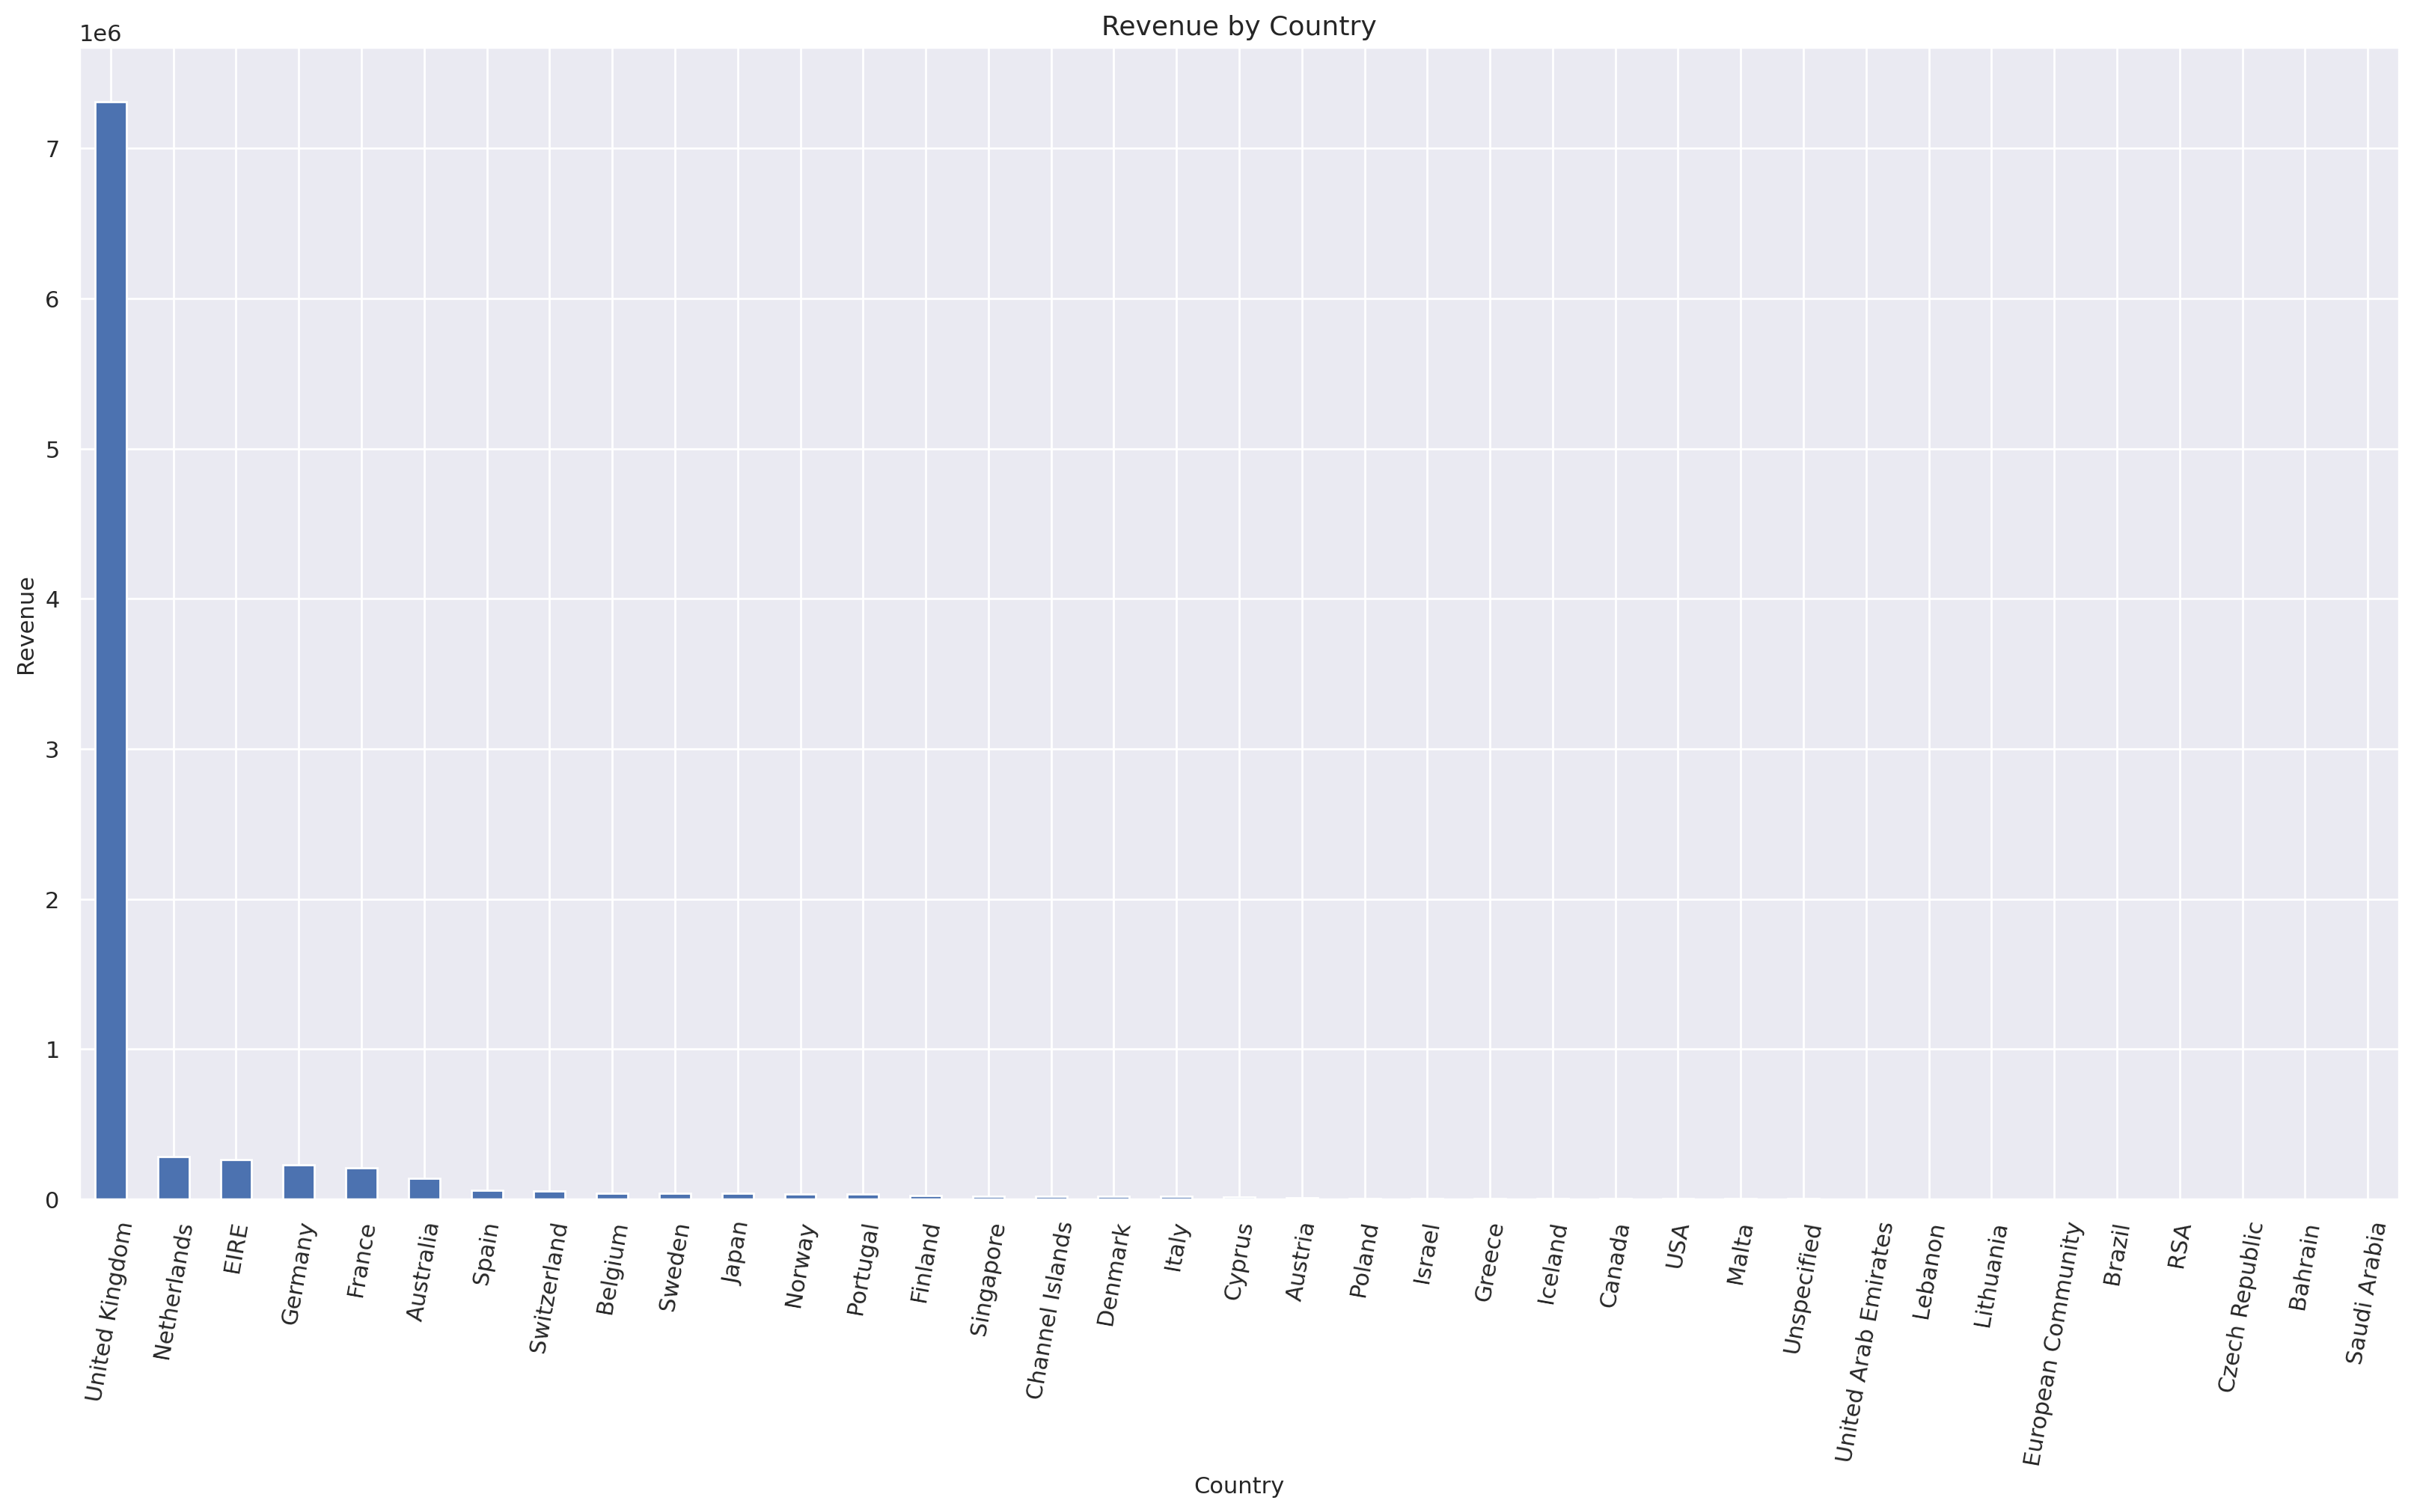

In [27]:
# 국가별매출 차트

plot_bar(rev_by_contries,'Country','Revenue','Revenue by Country')

In [28]:
# 월별매출 차트 ex) 201012, 201112 ...

df_retail['InvoiceDate'].dt.year.head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: InvoiceDate, dtype: int32

In [29]:
def extract_month(date):
  month = str(date.month)

  if date.month < 10:
    month = '0' + month

  return str(date.year) + month

In [30]:
# groupby(함수)[함수에넣을변수값]

rev_by_month = df_retail.set_index('InvoiceDate').groupby(extract_month)['CheckoutPrice'].sum()
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

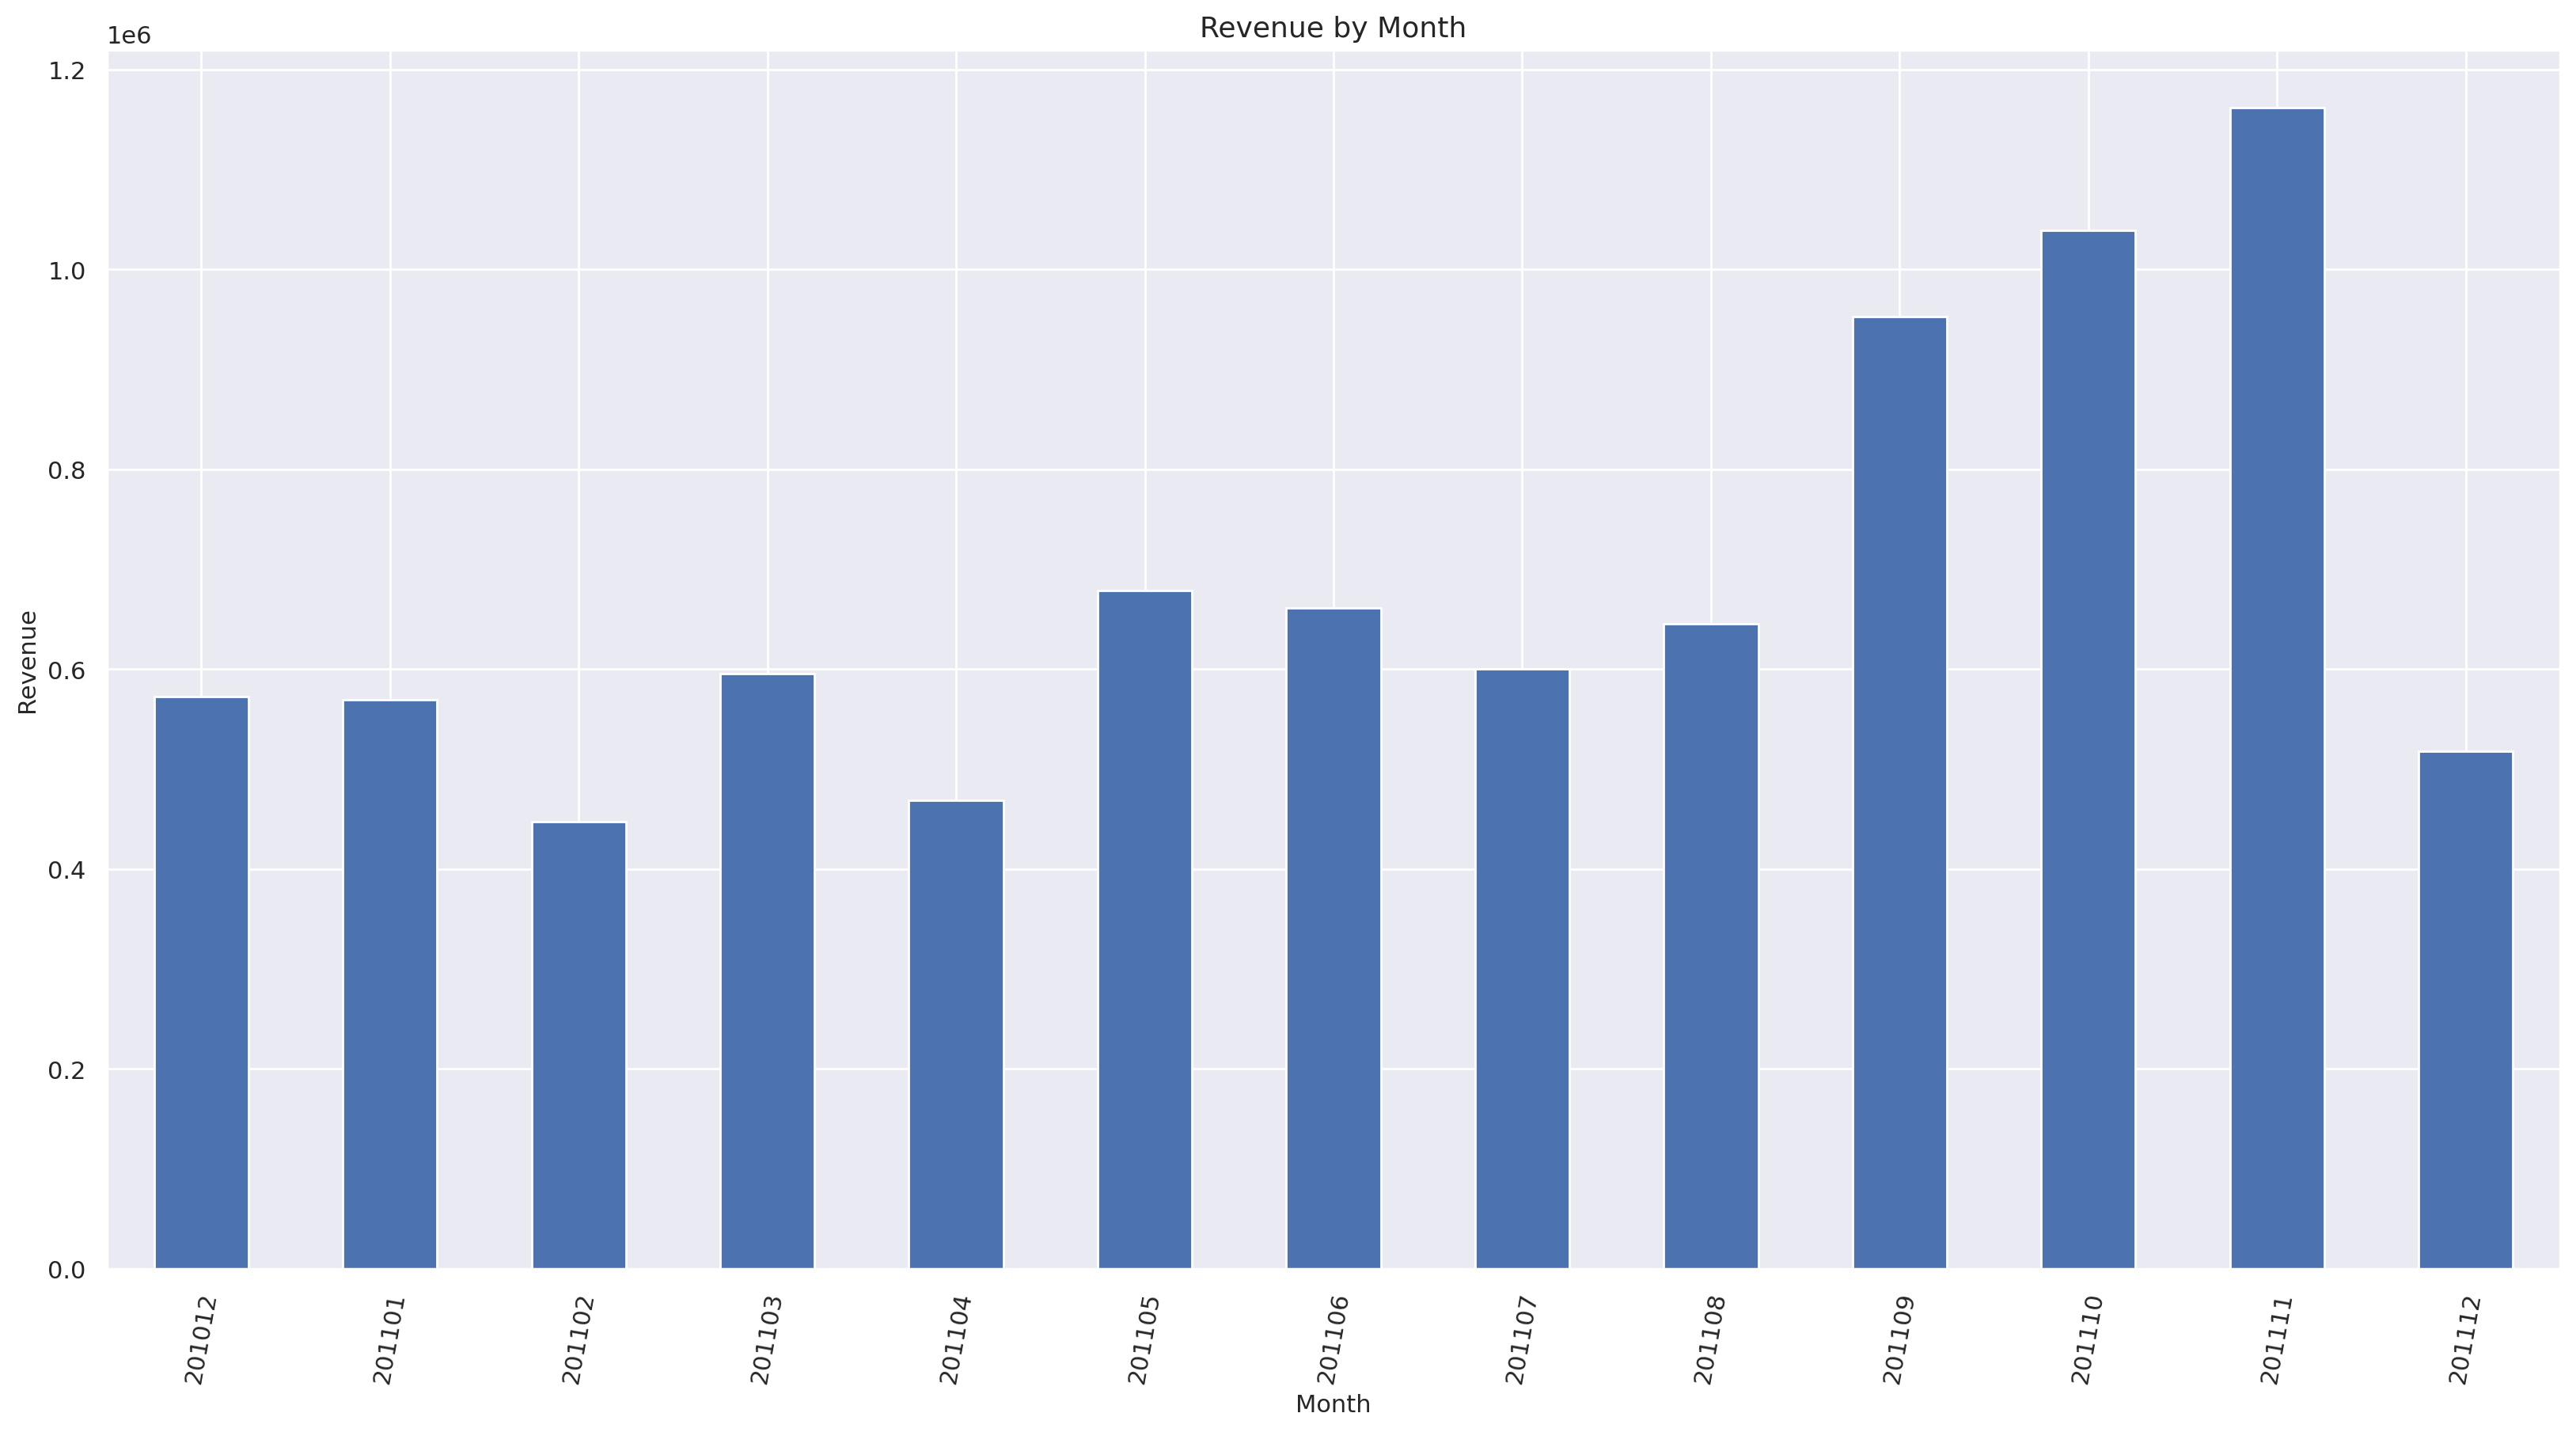

In [31]:
# 월별매출 차트

plot_bar(rev_by_month,'Month','Revenue','Revenue by Month')

In [32]:
date = pd.to_datetime('2024-06-16')

# day_of_week : 월요일-0 , 일요일-6
#               요일을 숫자로 리턴해준다
date.day_of_week

6

In [33]:
# 요일별 매출 차트

rev_by_dow = df_retail.set_index('InvoiceDate').groupby(lambda d:d.day_of_week)['CheckoutPrice'].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [34]:
DAY_OF_WEEK = np.array(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

# rev_by_dow.index = 0
# DAY_OF_WEEK[0] = 'Mon'

# 요일명으로 인덱스 변환
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

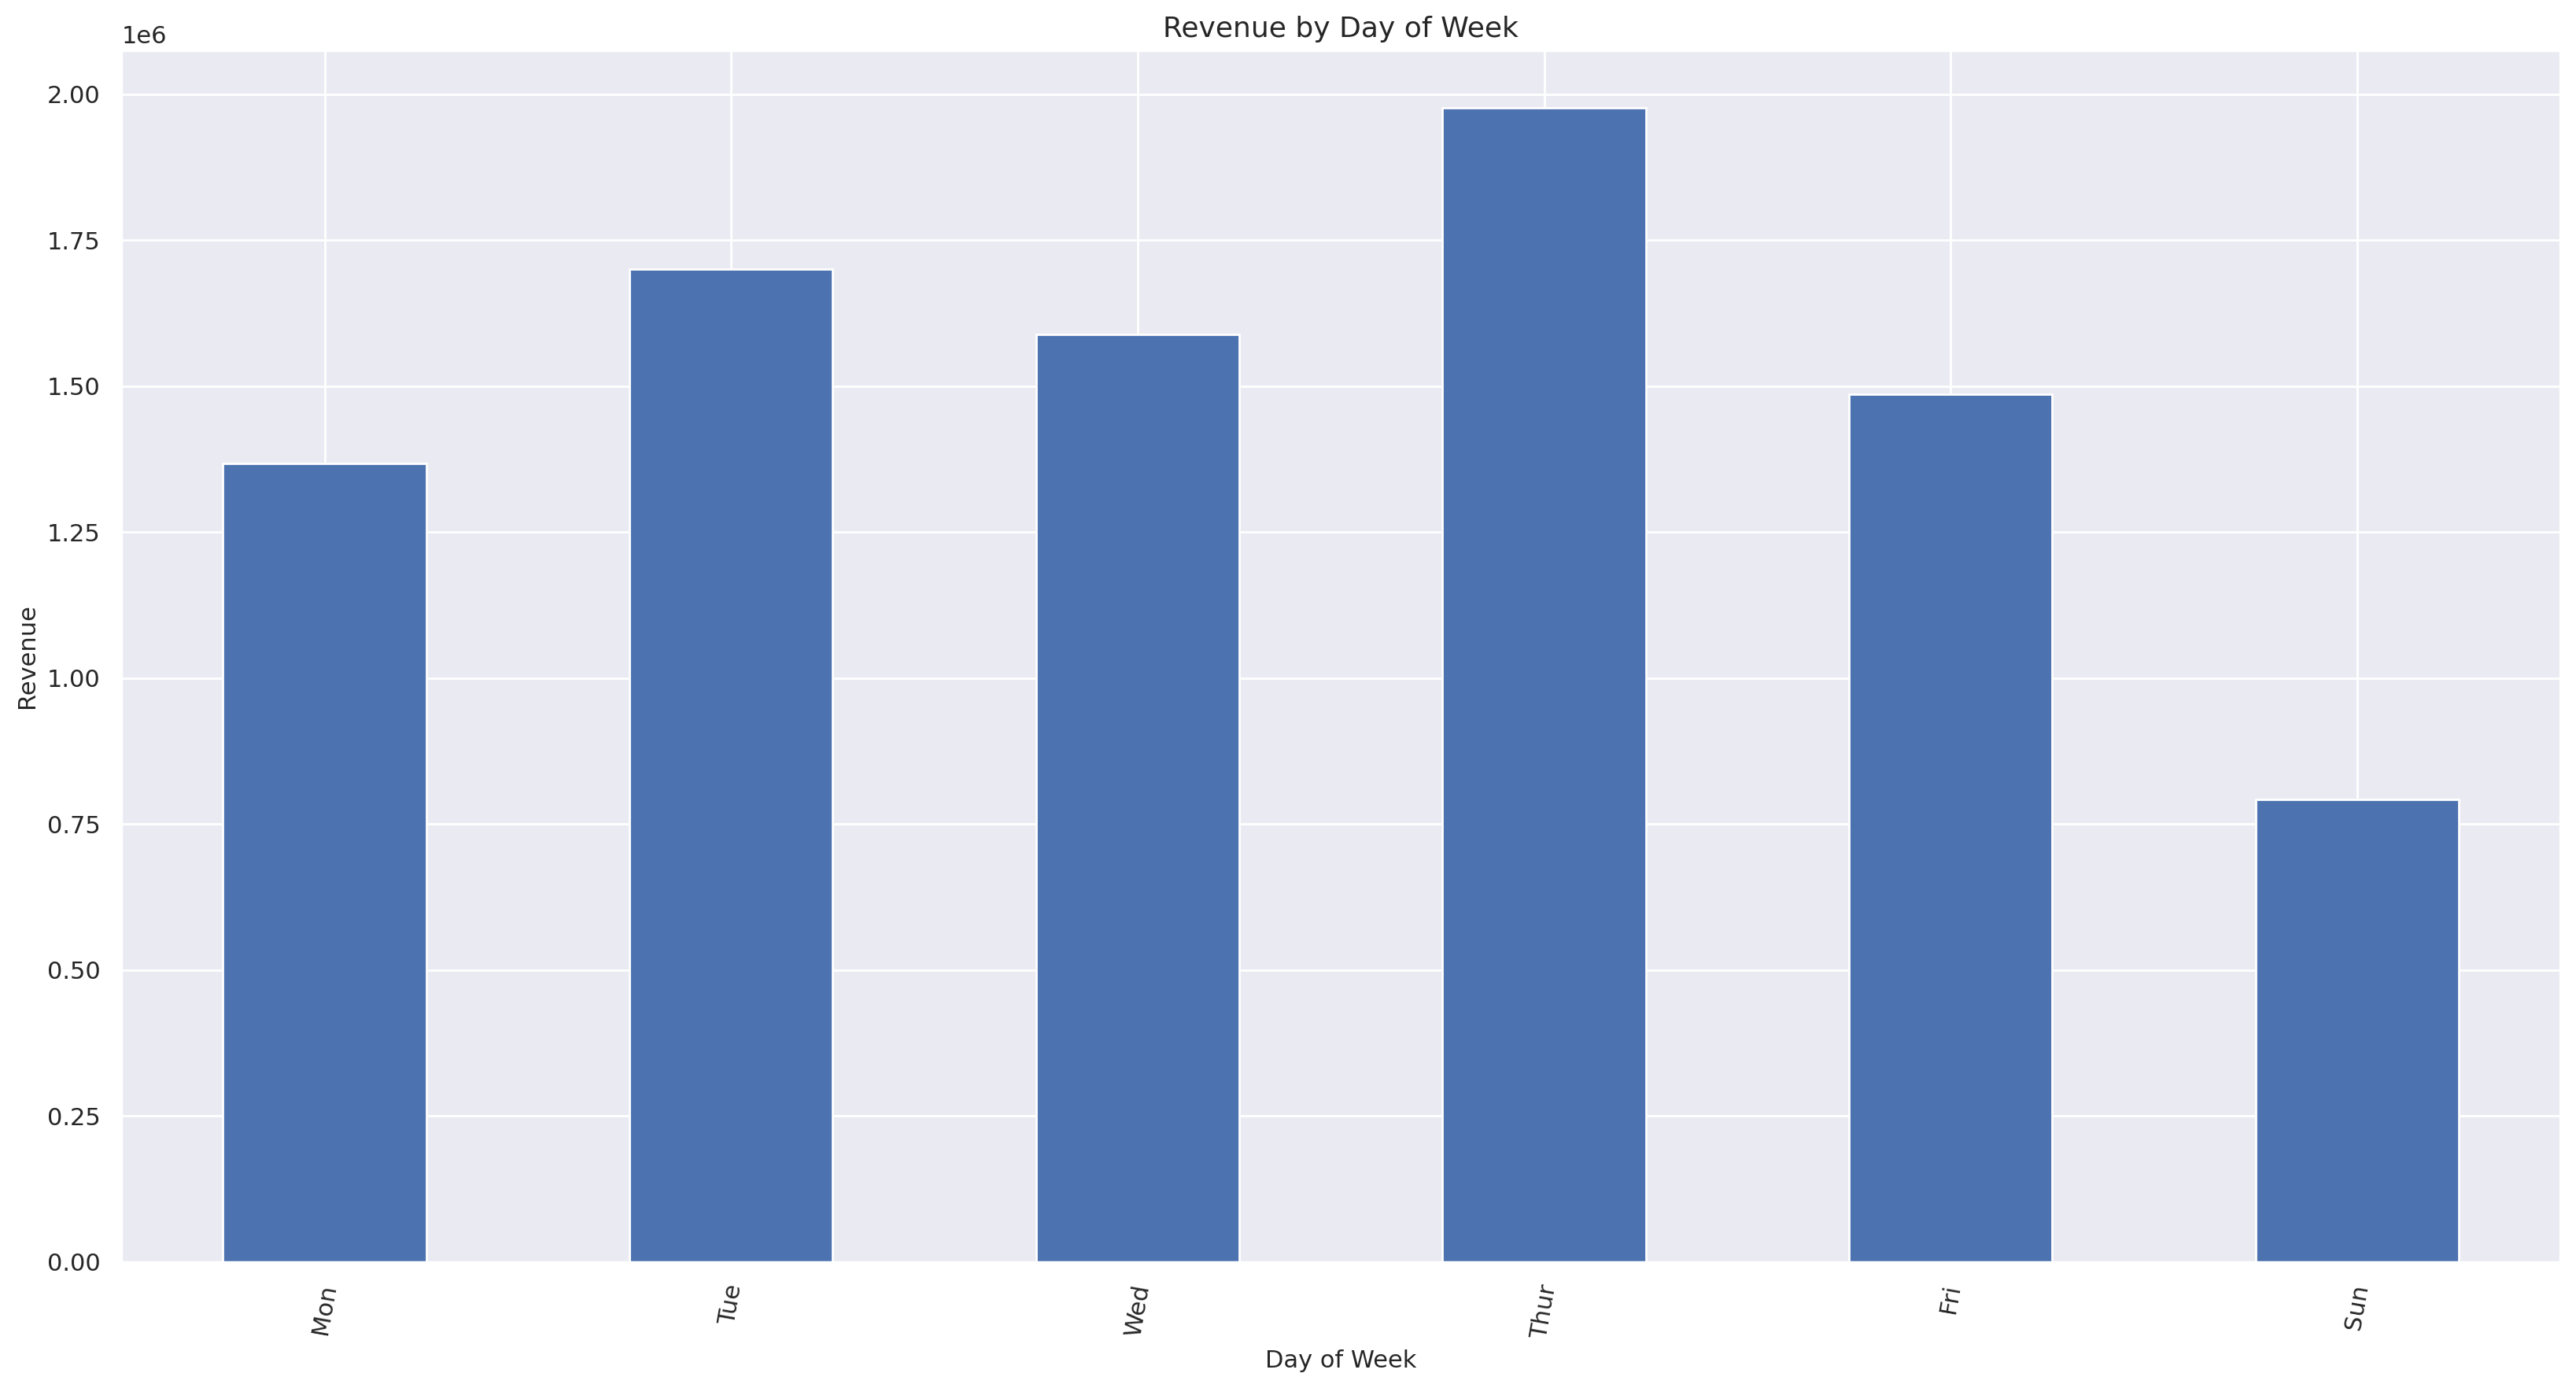

In [35]:
plot_bar(rev_by_dow,'Day of Week','Revenue','Revenue by Day of Week')

In [36]:
# 시간별 매출

rev_by_hour = df_retail.set_index('InvoiceDate').groupby(lambda d:d.hour)['CheckoutPrice'].sum()
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

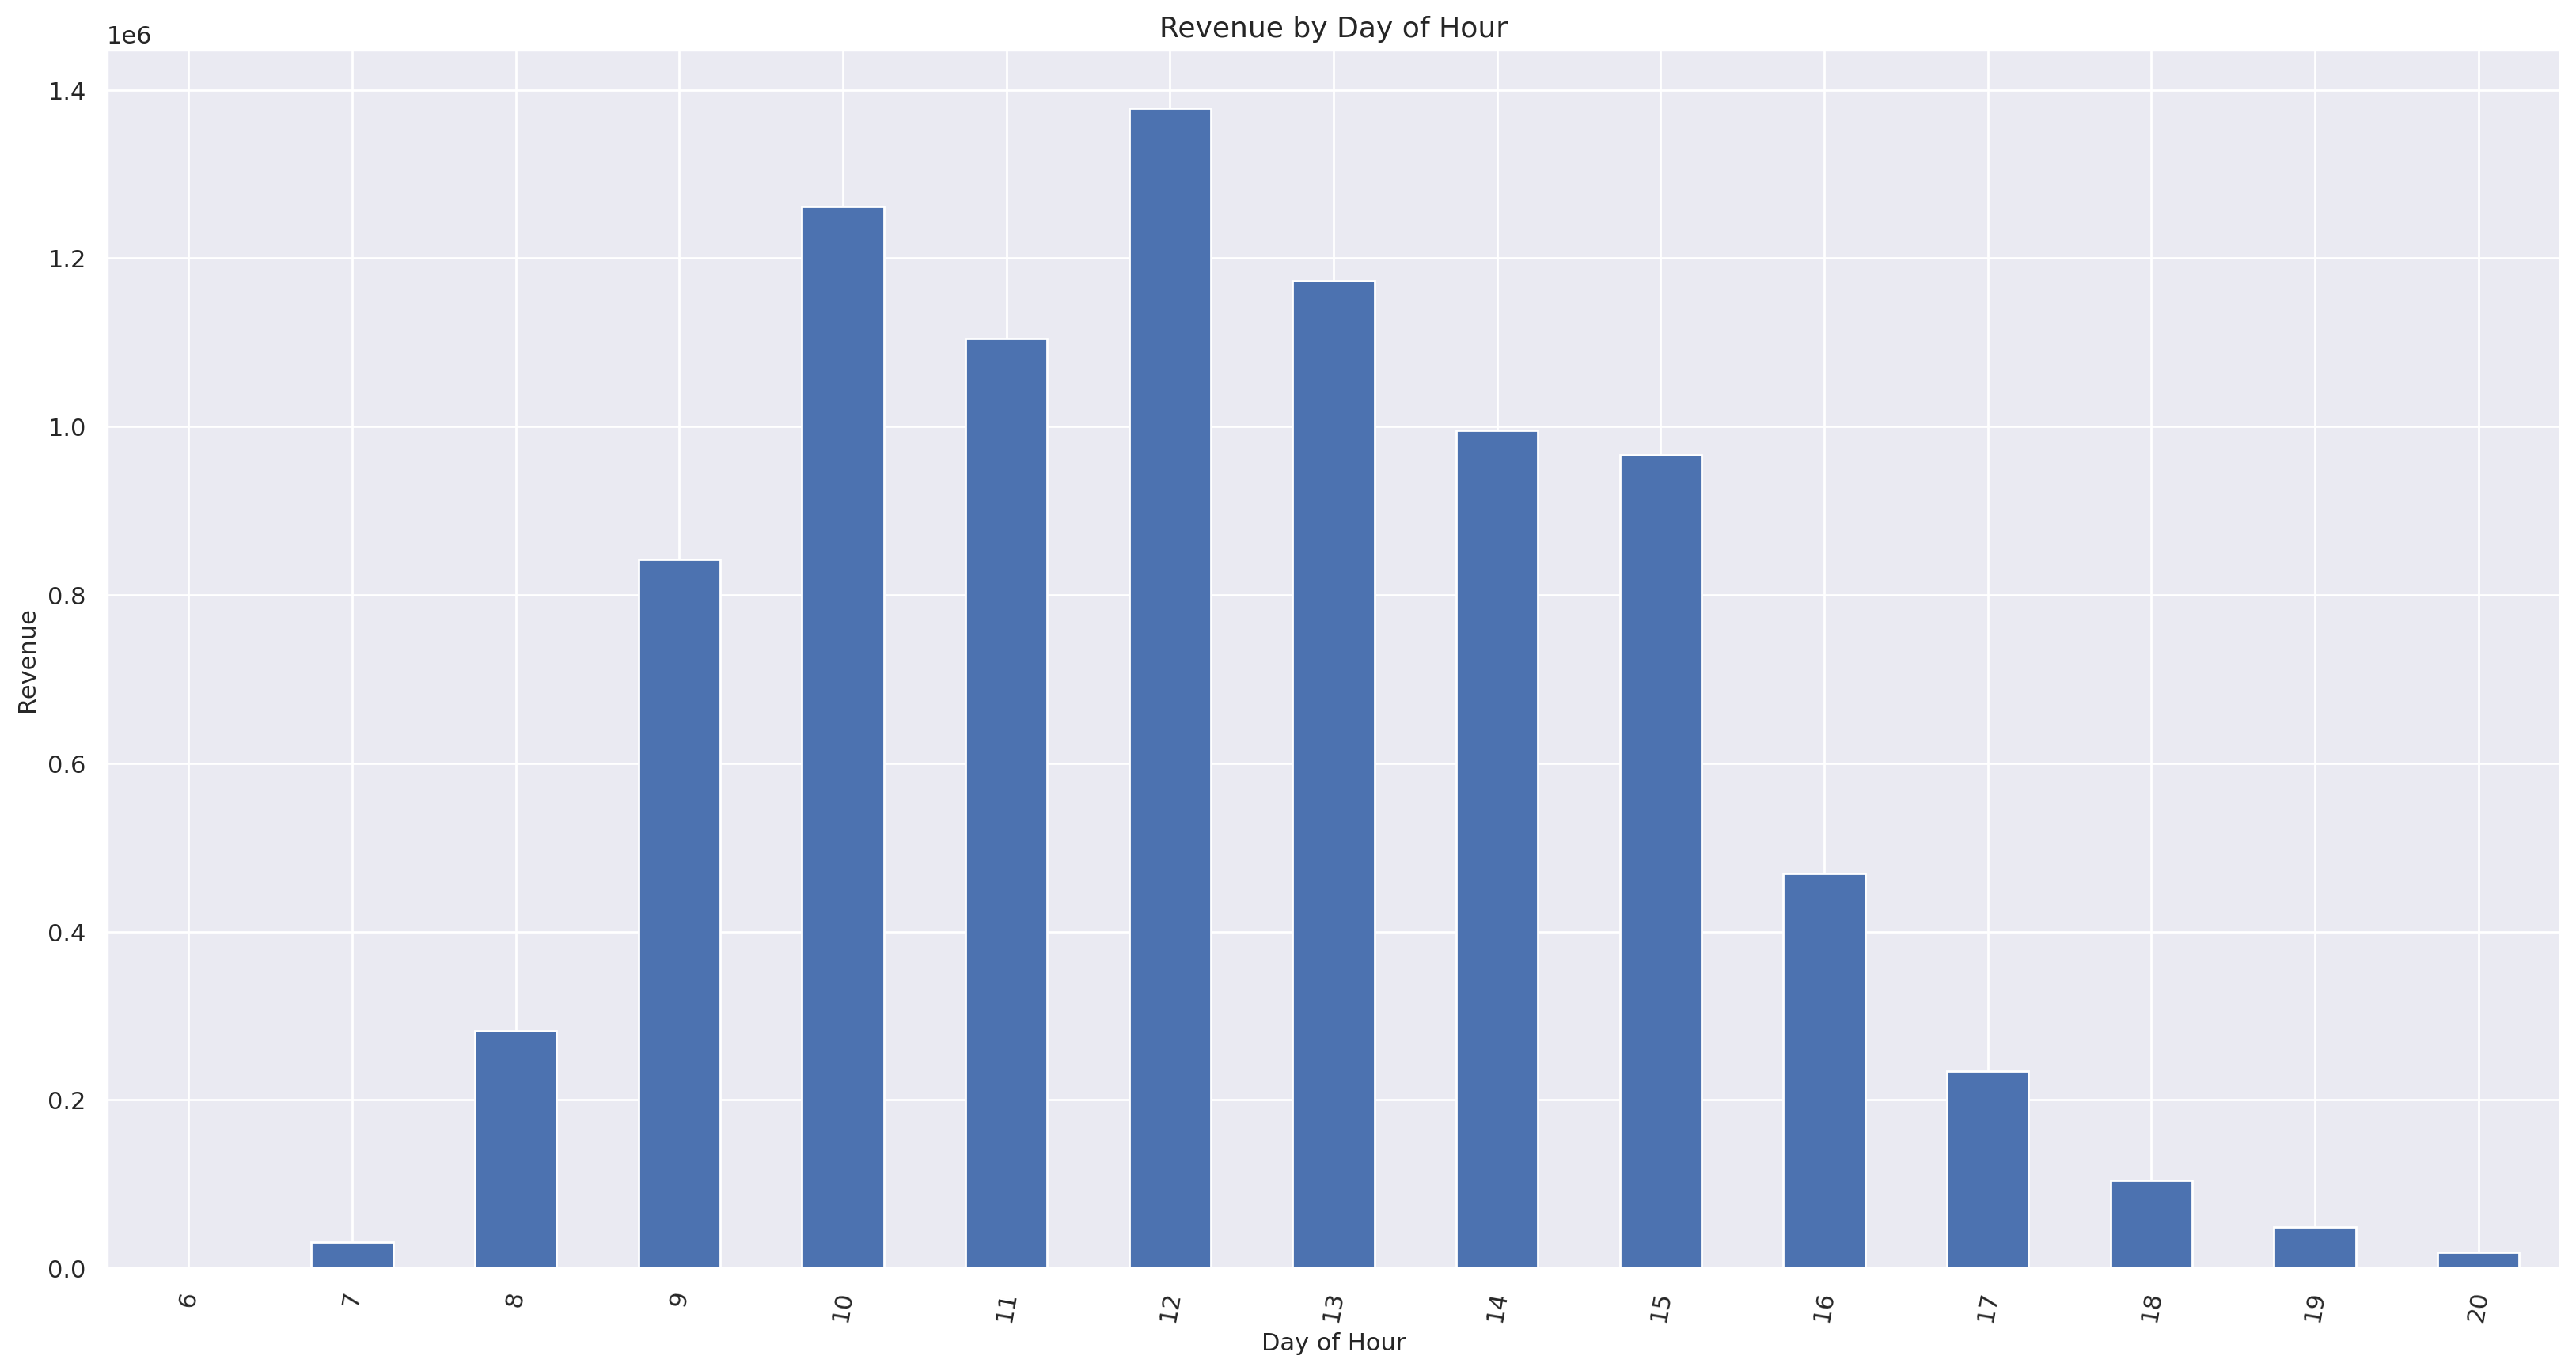

In [37]:
# 시간별 매출 차트

plot_bar(rev_by_hour,'Day of Hour','Revenue','Revenue by Day of Hour')

- 전체매출의 82% 가 UK 에서 발생
- 2011 년도의 매출액이 가장 높았던 달은 11월
  - 블랙프라이데이, 사이버먼데이, 크리스마스 휴일로 인한 매출액 증가
- 일주일 중 목요일까지는 매축이 성장세를 보이고, 이후로 하락
- 7시를 기준으로 주문이 발생하며 12시까지 증가세, 16시 이후부터는 매출액 급락

### 제품
- Top10 판매 제품
- Top10 매출 제품

In [38]:
# df_retail.columns
# StockCode 별로 Quantity 합계 구한 뒤 상위 10개 추출

top_selling = df_retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [39]:
# StockCode 별로 CheckoutPrice 합계 구한 뒤 상위 10개 추출

top_revenue = df_retail.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False).head(10)
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

In [40]:
# Top 3

top_selling3 = df_retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:3]
top_selling3

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int64

In [41]:
# 전체제품
# df_retail.set_index('InvoiceDate').groupby(['StockCode',extract_month])[['Quantity','CheckoutPrice']].sum()

# top3 만 보려면?
# loc() 를 사용해서 StockCode 인덱스에 접근
df_retail.set_index('InvoiceDate').groupby(['StockCode',extract_month])[['Quantity','CheckoutPrice']].sum().loc[top_selling3.index]

Quantity  CheckoutPrice
StockCode InvoiceDate                         
23843     201112          80995      168469.60
23166     201101          74215       77183.60
          201105            792         869.04
          201106            391         458.51
          201107            718         826.94
          201108            405         486.09
          201109            342         397.26
          201110            235         283.67
          201111            631         708.11
          201112            187         203.51
84077     201012           5139        1150.47
          201101           1488         385.44
          201102           3457         795.17
          201103           3888         943.20
          201104          10224        2281.44
          201105           4944        1249.44
          201106           1920         533.76
          201107           3600         982.56
          201108           2256         654.24
          201109           3462         985.70
          201110           8174        1953.98
          201111           4500        1294.20
          201112           1363         376.65

### 자주 등장하는 상품명
- 워드 클라우드 : 글자를 시각화
- https://github.com/amueller/word_cloud

In [42]:
!pip install wordcloud

In [43]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

### 데이터 로드

In [44]:
text = open('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/constitution.txt').read()
text

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defence, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish this Constitution for the United States of America.\n\nArticle. I.\n\nSection. 1.\n\nAll legislative Powers herein granted shall be vested in a Congress of the United States, which shall consist of a Senate and House of Representatives.\n\nSection. 2.\n\nThe House of Representatives shall be composed of Members chosen every second Year by the People of the several States, and the Electors in each State shall have the Qualifications requisite for Electors of the most numerous Branch of the State Legislature.\n\nNo Person shall be a Representative who shall not have attained to the Age of twenty five Years, and been seven Years a Citizen of the United States, and who shall not, when elected, be an Inhabitant of that

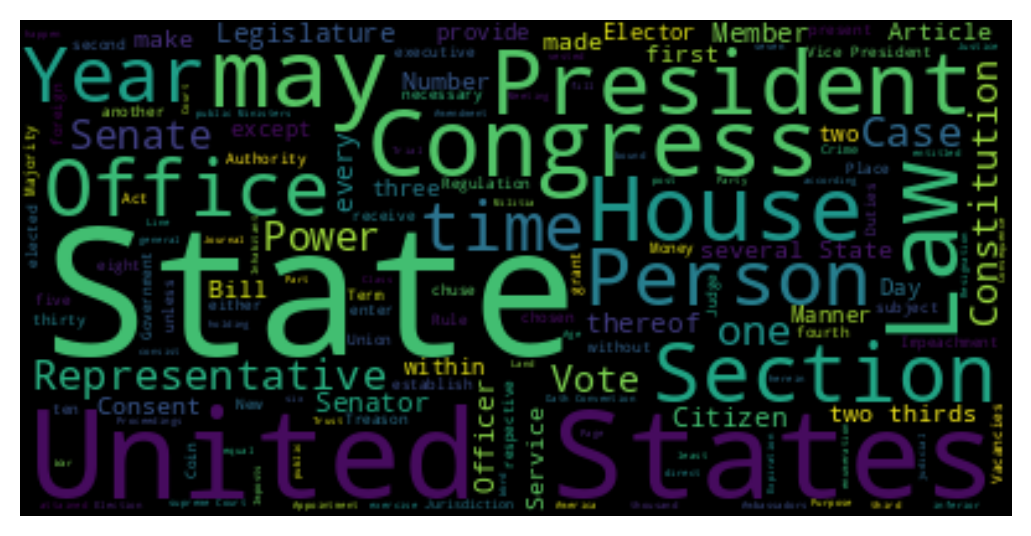

In [45]:
# 많이 나오는 단어 위주로 강조해서 시각화 해준다

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

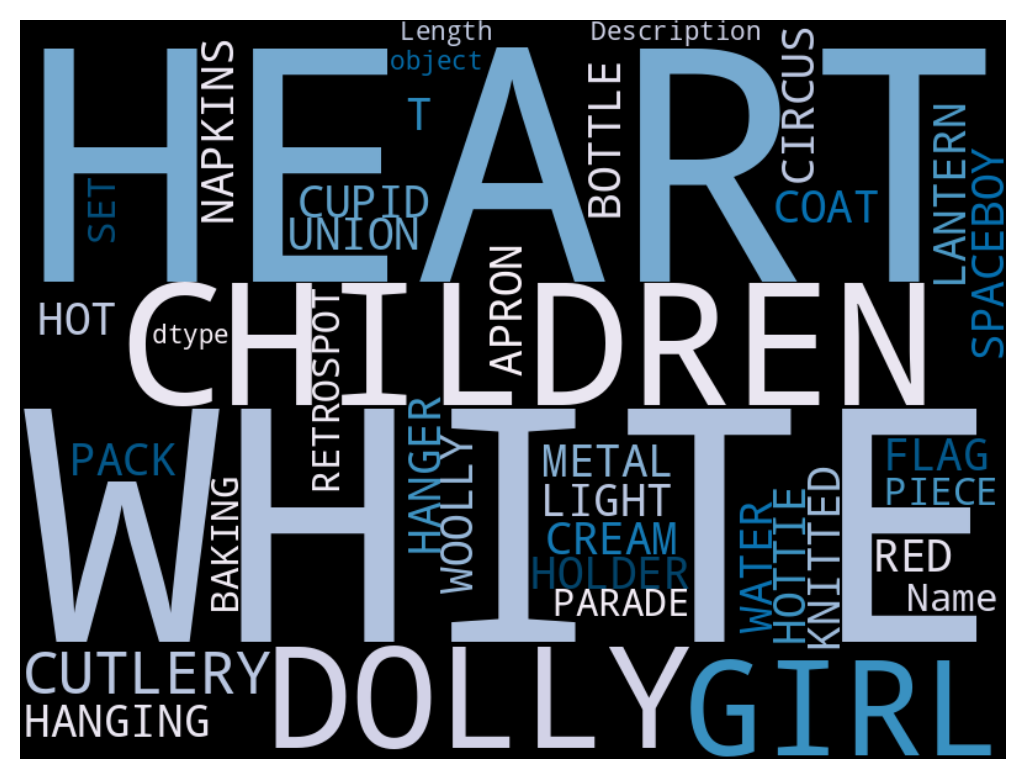

In [46]:

wordcloud = WordCloud(
    background_color='black',
    width=800,
    height=600,
    colormap='PuBu'
)

wordcloud.generate(str(df_retail['Description']))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### 우수고객
- 구매 횟수 기준
- 지불 금액 기준

In [47]:
# 구매횟수

df_retail.groupby('CustomerID')['Quantity'].count().sort_values(ascending=False)[:10]

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
15311    2379
14646    2076
13089    1818
13263    1677
14298    1637
Name: Quantity, dtype: int64

In [48]:
# 금액기준

df_retail.groupby('CustomerID')['CheckoutPrice'].sum().sort_values(ascending=False).head(10)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: CheckoutPrice, dtype: float64

### 월간 사용자 cohort 를 바탕으로 재구매율 분석
- heatmap 시각화

In [49]:
# 일자를 모두 1일로 변경하는 함수
# 2011-12-11 => 2011-12-01

from datetime import datetime

def get_month_as_datetime(date):
  return datetime(date.year,date.month,1)

In [50]:
df_retail['Month'] = df_retail['InvoiceDate'].apply(get_month_as_datetime)
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [51]:
# 사용자의 첫 구매월

month_group = df_retail.groupby('CustomerID')['Month']
# df_retail['MonthStarted'] = min(month_group)
df_retail['MonthStarted'] = month_group.transform(np.min)
df_retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
184313,560108,20685,DOORMAT RED RETROSPOT,2,2011-07-15 08:59:00,7.95,16979,United Kingdom,15.90,2011-07-01,2011-02-01
177882,559327,22766,PHOTO FRAME CORNICE,8,2011-07-07 15:21:00,2.95,13681,United Kingdom,23.60,2011-07-01,2011-07-01
283835,570672,22998,TRAVEL CARD WALLET KEEP CALM,24,2011-10-11 14:52:00,0.42,12536,France,10.08,2011-10-01,2011-10-01
249485,567482,22406,MONEY BOX KINGS CHOICE DESIGN,1,2011-09-20 13:42:00,1.25,16464,United Kingdom,1.25,2011-09-01,2011-07-01
238794,566345,22086,PAPER CHAIN KIT 50'S CHRISTMAS,5,2011-09-12 12:27:00,2.95,17685,United Kingdom,14.75,2011-09-01,2010-12-01
169387,558115,23034,DRAWER KNOB CERAMIC BLACK,6,2011-06-27 08:50:00,1.45,16003,United Kingdom,8.70,2011-06-01,2010-12-01
272537,569640,21232,STRAWBERRY CERAMIC TRINKET BOX,60,2011-10-05 12:25:00,1.25,12471,Germany,75.00,2011-10-01,2010-12-01
174723,558887,47566,PARTY BUNTING,4,2011-07-04 15:26:00,4.95,18265,United Kingdom,19.80,2011-07-01,2011-07-01
67890,545301,22090,PAPER BUNTING RETROSPOT,6,2011-03-01 12:26:00,2.95,12679,France,17.70,2011-03-01,2011-03-01
173221,558709,22784,LANTERN CREAM GAZEBO,2,2011-07-01 13:02:00,4.95,17338,United Kingdom,9.90,2011-07-01,2010-12-01


In [52]:
# 최초 구매일로부터 몇 개월이 지난 후 재구매를 했는가?
# MonthPassed = Month - MonthStarted
# 2011-03-01 - 2010-12-01
# 2011-2010 = 1 * 12
# 3-12 = -9
# 12 + (-9)

df_retail['MonthPassed'] = (df_retail['Month'].dt.year - df_retail['MonthStarted'].dt.year) * 12 + \
                          (df_retail['Month'].dt.month - df_retail['MonthStarted'].dt.month)


In [53]:
df_retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
294139,571681,23537,WALL ART I LOVE LONDON,6,2011-10-18 13:44:00,4.95,16734,United Kingdom,29.70,2011-10-01,2011-08-01,2
252096,567805,23330,DECORATIVE WICKER HEART MEDIUM,2,2011-09-22 12:15:00,1.25,12854,United Kingdom,2.50,2011-09-01,2011-01-01,8
173280,558710,22955,36 FOIL STAR CAKE CASES,1,2011-07-01 13:04:00,2.10,15483,United Kingdom,2.10,2011-07-01,2011-03-01,4
344434,576339,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-11-14 15:27:00,5.79,14096,United Kingdom,11.58,2011-11-01,2011-08-01,3
160039,556960,21166,COOK WITH WINE METAL SIGN,12,2011-06-16 09:28:00,2.08,14844,United Kingdom,24.96,2011-06-01,2011-04-01,2
202261,562213,21790,VINTAGE SNAP CARDS,3,2011-08-03 13:39:00,0.85,13975,United Kingdom,2.55,2011-08-01,2011-03-01,5
393142,581101,23404,HOME SWEET HOME BLACKBOARD,2,2011-12-07 11:48:00,4.95,17835,United Kingdom,9.90,2011-12-01,2011-11-01,1
228320,565316,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-02 12:52:00,4.95,15628,United Kingdom,14.85,2011-09-01,2010-12-01,9
334785,575607,22603,CHRISTMAS RETROSPOT TREE WOOD,1,2011-11-10 12:37:00,1.63,14096,United Kingdom,1.63,2011-11-01,2011-08-01,3
147129,555406,22296,HEART IVORY TRELLIS LARGE,6,2011-06-02 19:50:00,1.65,17231,United Kingdom,9.90,2011-06-01,2010-12-01,6


In [54]:
df_retail.groupby(['MonthStarted','MonthPassed'])['CustomerID'].apply(lambda x:np.unique(x))

MonthStarted  MonthPassed
2010-12-01    0              [12347, 12348, 12370, 12377, 12383, 12386, 123...
              1              [12347, 12348, 12377, 12383, 12386, 12417, 124...
              2              [12395, 12423, 12431, 12471, 12476, 12494, 125...
              3              [12370, 12383, 12395, 12417, 12423, 12471, 124...
              4              [12347, 12348, 12383, 12417, 12423, 12429, 124...
                                                   ...                        
2011-10-01    1              [12498, 12552, 12628, 12630, 12723, 12827, 128...
              2              [12572, 12628, 12646, 12719, 12723, 12827, 128...
2011-11-01    0              [12349, 12357, 12374, 12391, 12445, 12452, 124...
              1              [12762, 12950, 12985, 13040, 13318, 13521, 135...
2011-12-01    0              [12367, 12442, 12478, 12558, 12587, 12650, 127...
Name: CustomerID, Length: 91, dtype: object

In [55]:
# 2010-12-01 0 : 885 명이 구입
# 2010-12-01 1 : (1개월이 지난후) 324 명이 구입

df_retail.groupby(['MonthStarted','MonthPassed'])['CustomerID'].apply(lambda x:len(np.unique(x)))

MonthStarted  MonthPassed
2010-12-01    0              885
              1              324
              2              286
              3              340
              4              321
                            ... 
2011-10-01    1               86
              2               41
2011-11-01    0              323
              1               36
2011-12-01    0               41
Name: CustomerID, Length: 91, dtype: int64

In [56]:
# 데이터프레임 형태로 만들기

df_cohort = df_retail.groupby(['MonthStarted','MonthPassed'])['CustomerID'].apply(lambda x:len(np.unique(x))).reset_index()
df_cohort

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,323
89,2011-11-01,1,36


In [57]:
# 피봇

df_cohort = df_cohort.pivot(index='MonthStarted',columns='MonthPassed')
df_cohort

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01        284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01        242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01        188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01        169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01        299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01        358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [58]:
# 비율로 나타내기 (MonthPassed[0] 이 100% 로 잡고)

df_cohort_rate = round(df_cohort.div(df_cohort.iloc[:,0],axis=0) * 100, 2)
df_cohort_rate

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

### Heatmap 차트 그리기

<Axes: xlabel='None-MonthPassed', ylabel='MonthStarted'>

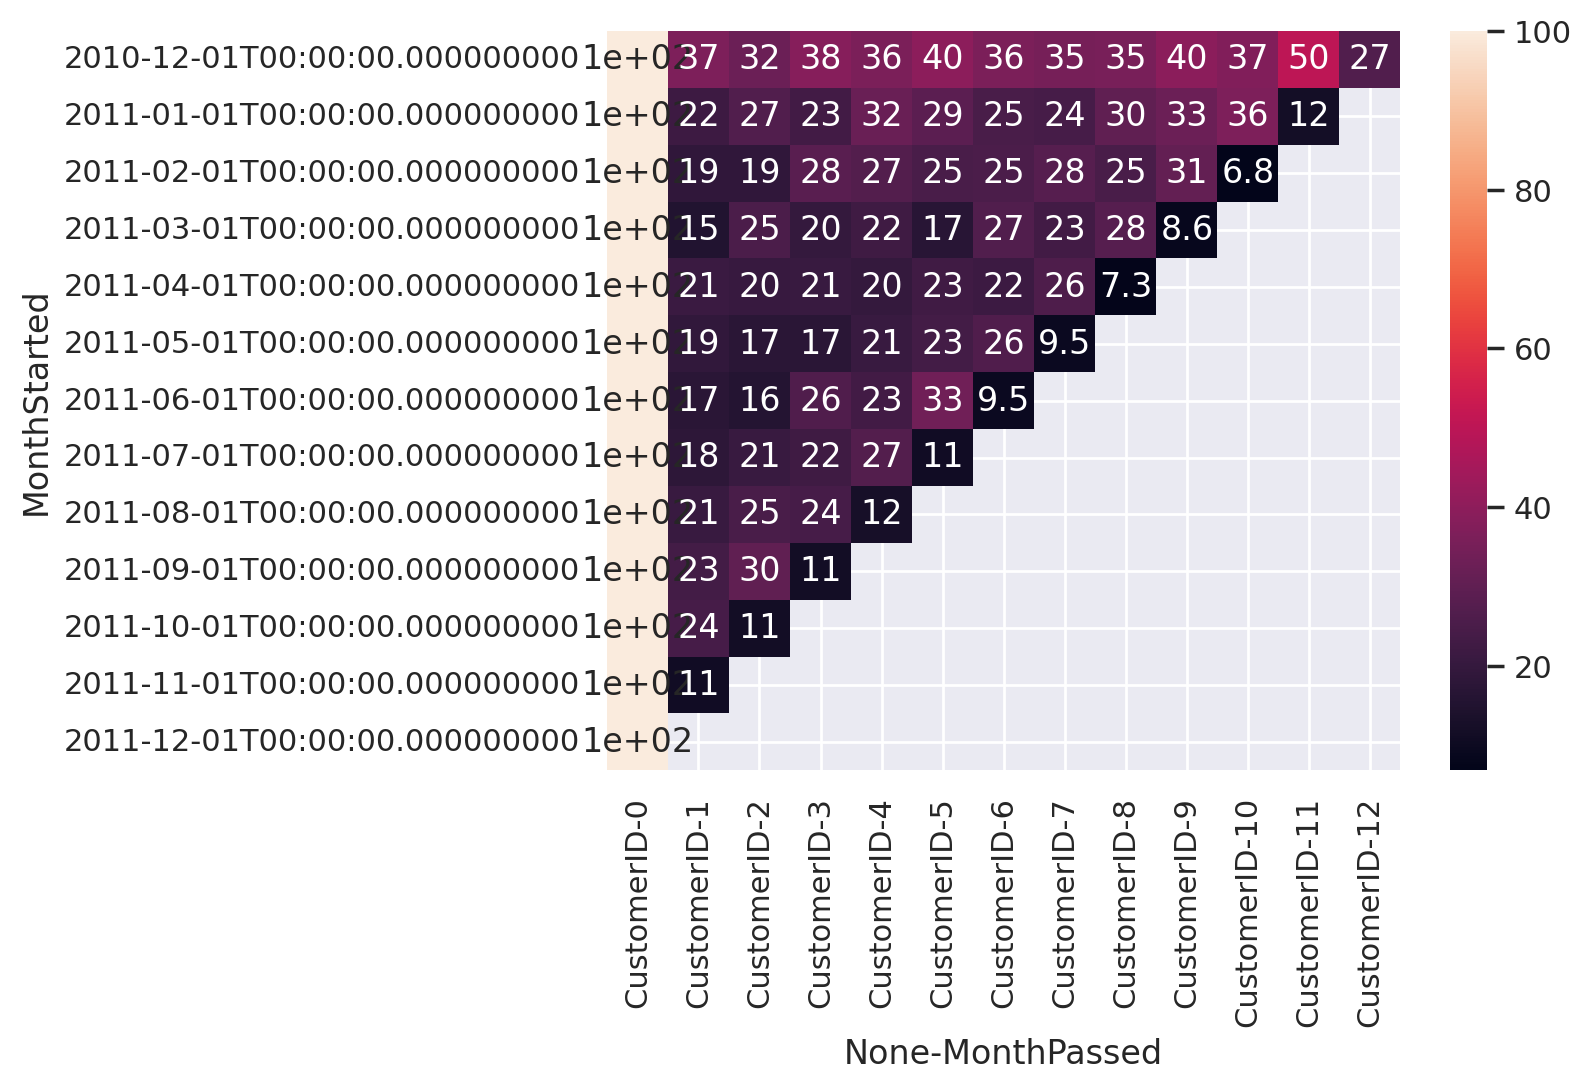

In [59]:
# 기본모양

sns.heatmap(df_cohort_rate, annot=True)

<Axes: xlabel='None-MonthPassed', ylabel='MonthStarted'>

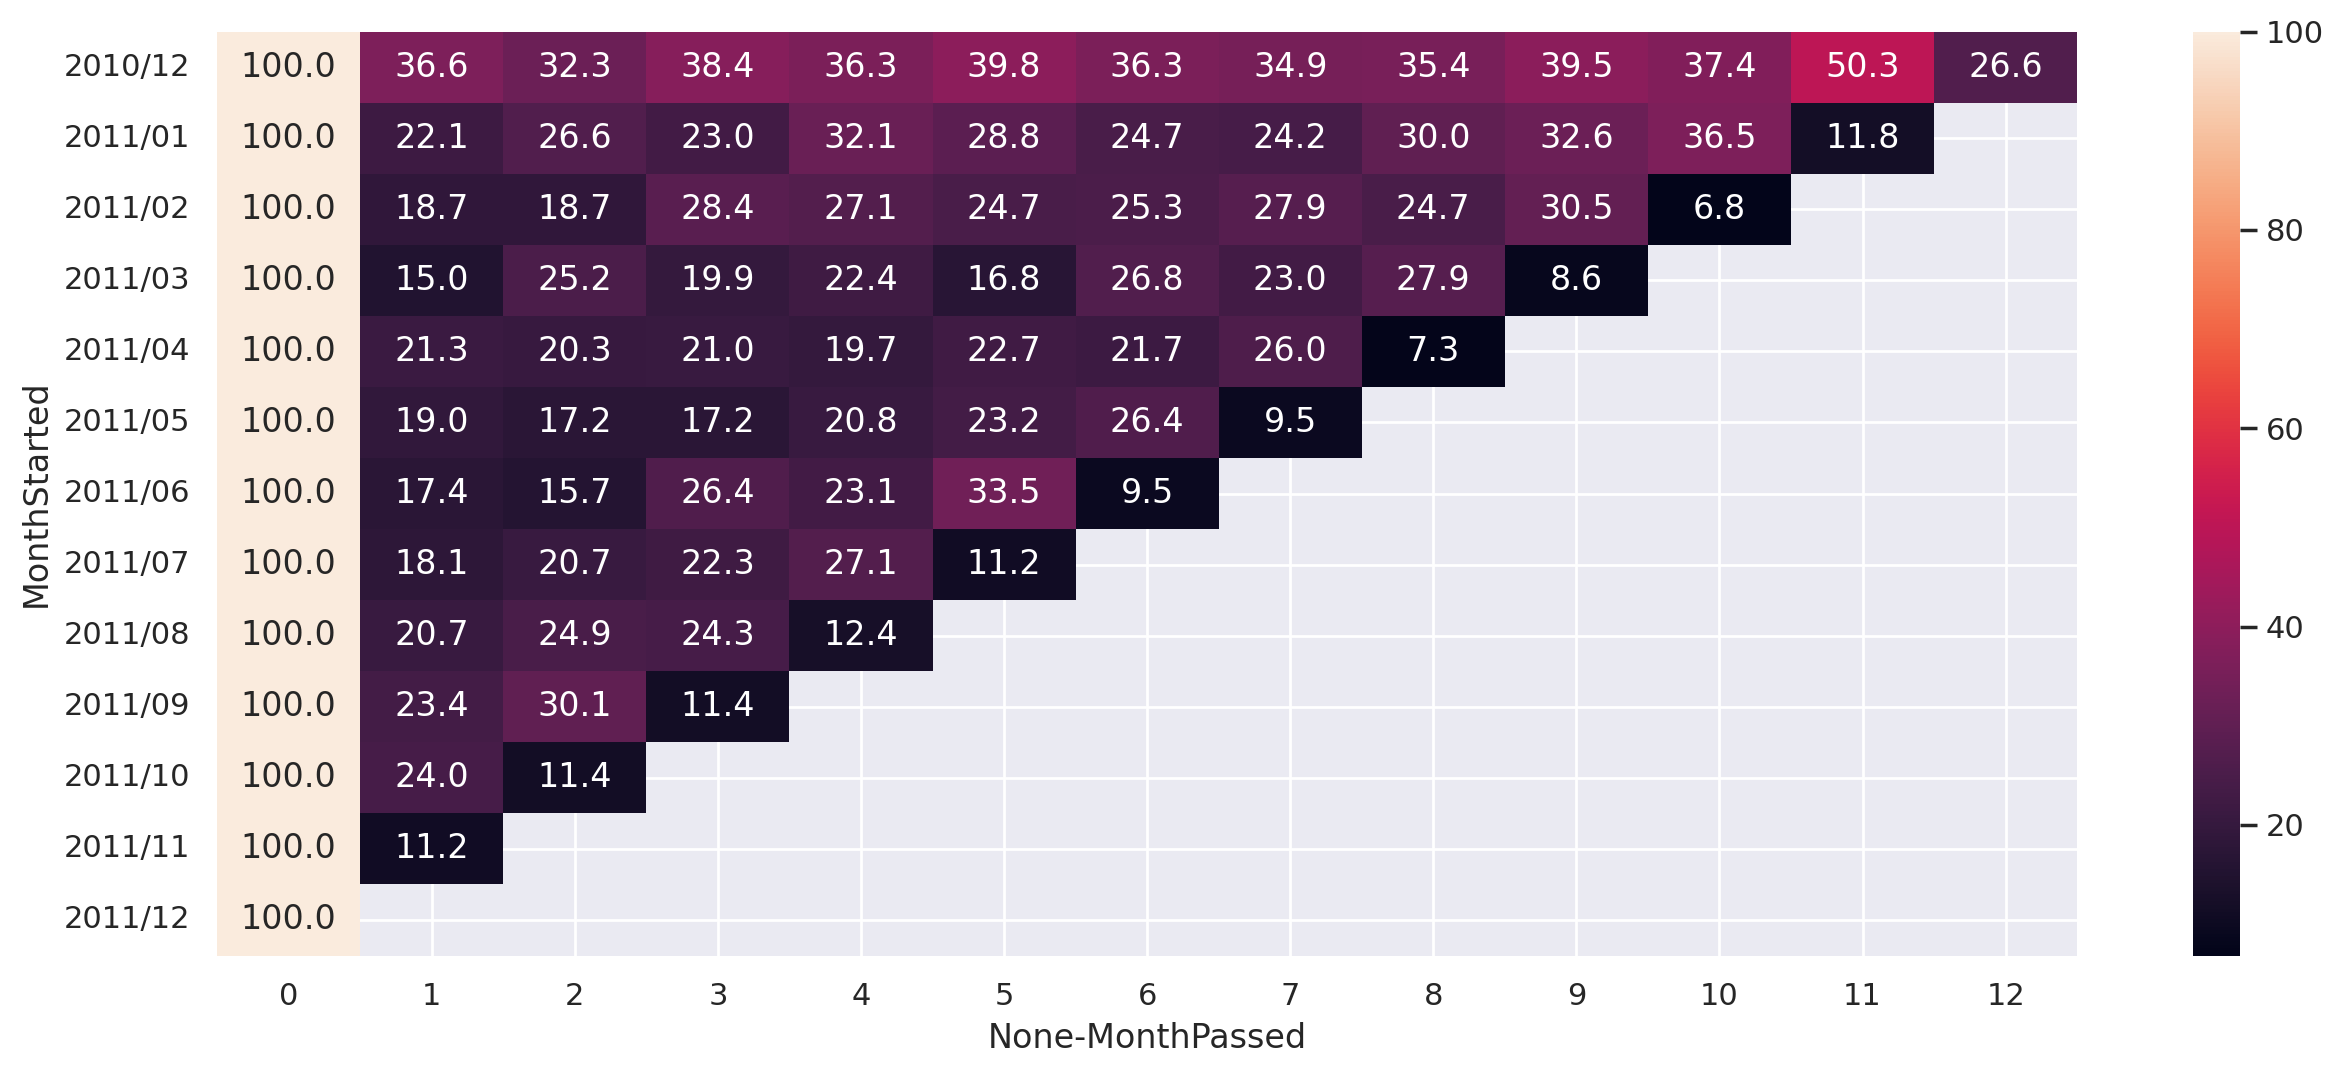

In [60]:
# 0 ~ 12
# fmt='.1f' : 소수점 1자리 까지만 표시

xticks = np.arange(0,13)
yticks = ['2010/12','2011/01','2011/02','2011/03','2011/04','2011/05','2011/06','2011/07','2011/08','2011/09','2011/10','2011/11','2011/12']
plt.figure(figsize=(15,6))

sns.heatmap(df_cohort_rate, annot=True, xticklabels=xticks, yticklabels=yticks, fmt='.1f')

In [62]:
df_retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12-01,2010-12-01,0


In [65]:
# 구매시간이 많은곳에 광고를 만약에 한다면
# 시간만 가지고 나와서 카운트 세보기
# InvoiceDate : 2010-12-01 08:26:00
# df_retail['InvoiceDate'].apply(lambda date:date.hour)

order_by_hour = df_retail.set_index('InvoiceDate').groupby(lambda date:date.hour)['CustomerID'].count()
order_by_hour

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

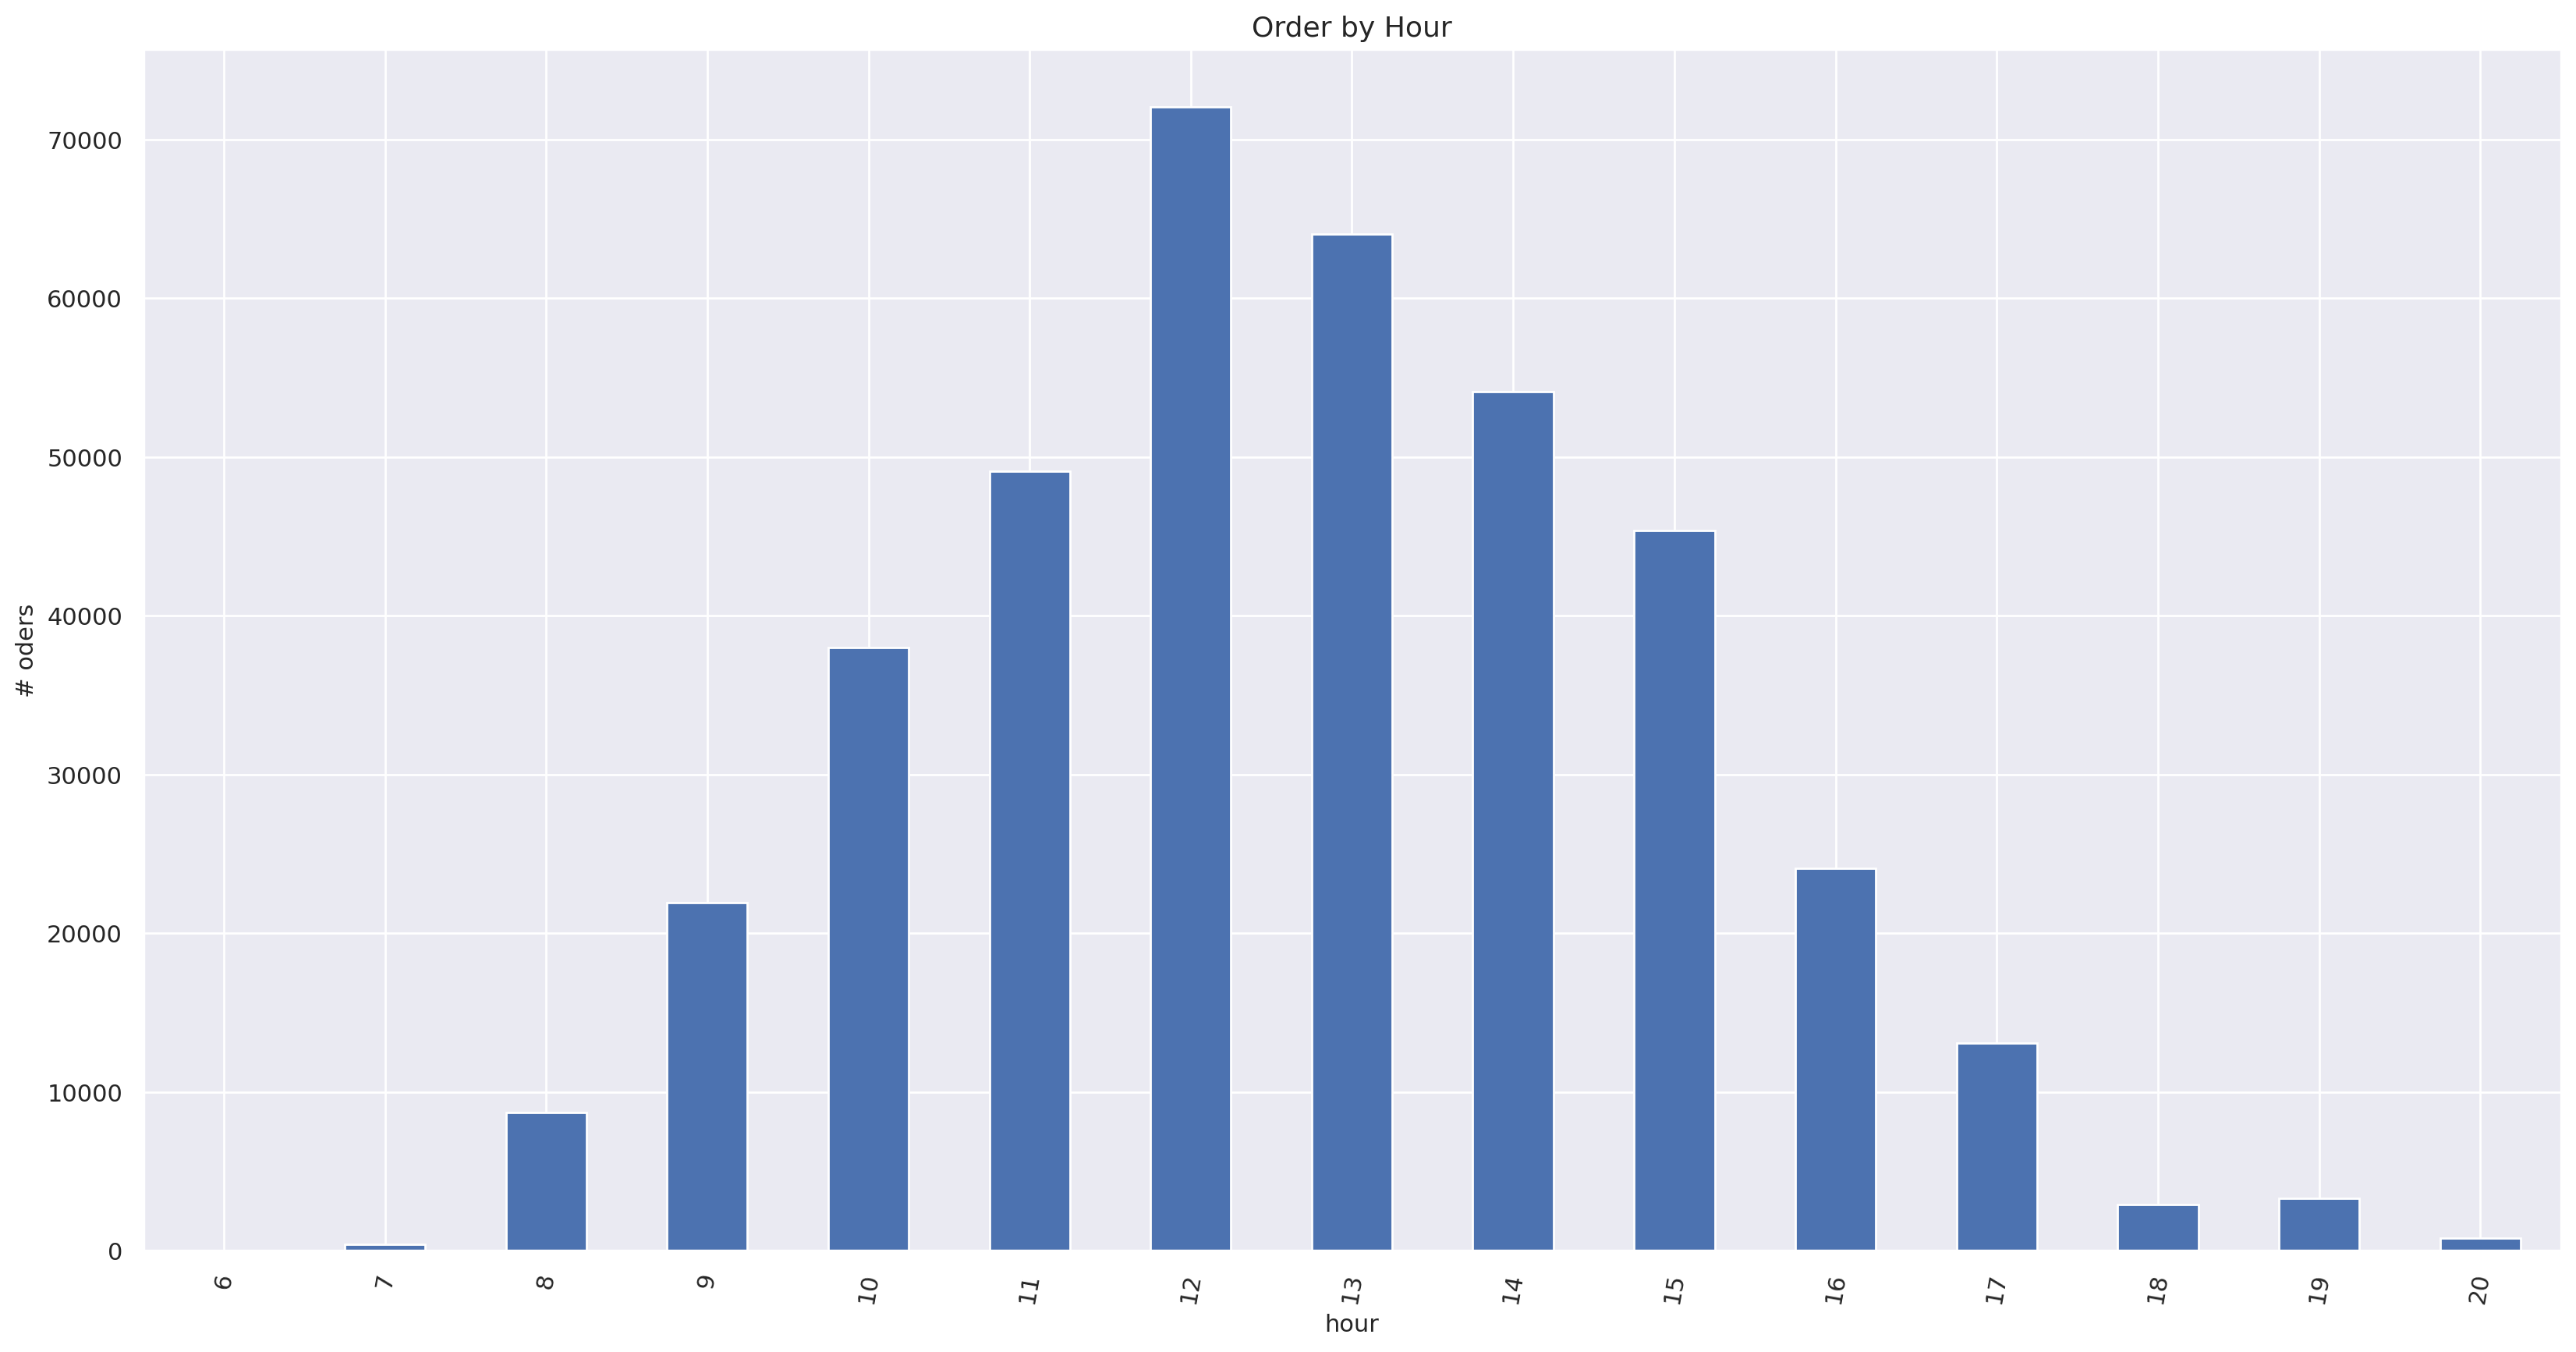

In [66]:
# 차트 시각화

plot_bar(order_by_hour,'hour','# orders','Order by Hour')

In [68]:
# 30분 단위로 세분화
# 함수 정의
# 2010-12-01 08:26:00 : 분을 먼저 추출, 30분 이상이면 08:30 아니면 08:00
def half_an_hour(date):
  minute = ":00"
  if date.minute > 30:
    minute = ":30"
  hour = str(date.hour)
  if date.hour < 10:
    hour = '0' + hour
  return hour + minute

order_by_hour_half = df_retail.set_index('InvoiceDate').groupby(half_an_hour)['CustomerID'].count()
order_by_hour_half

InvoiceDate
06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

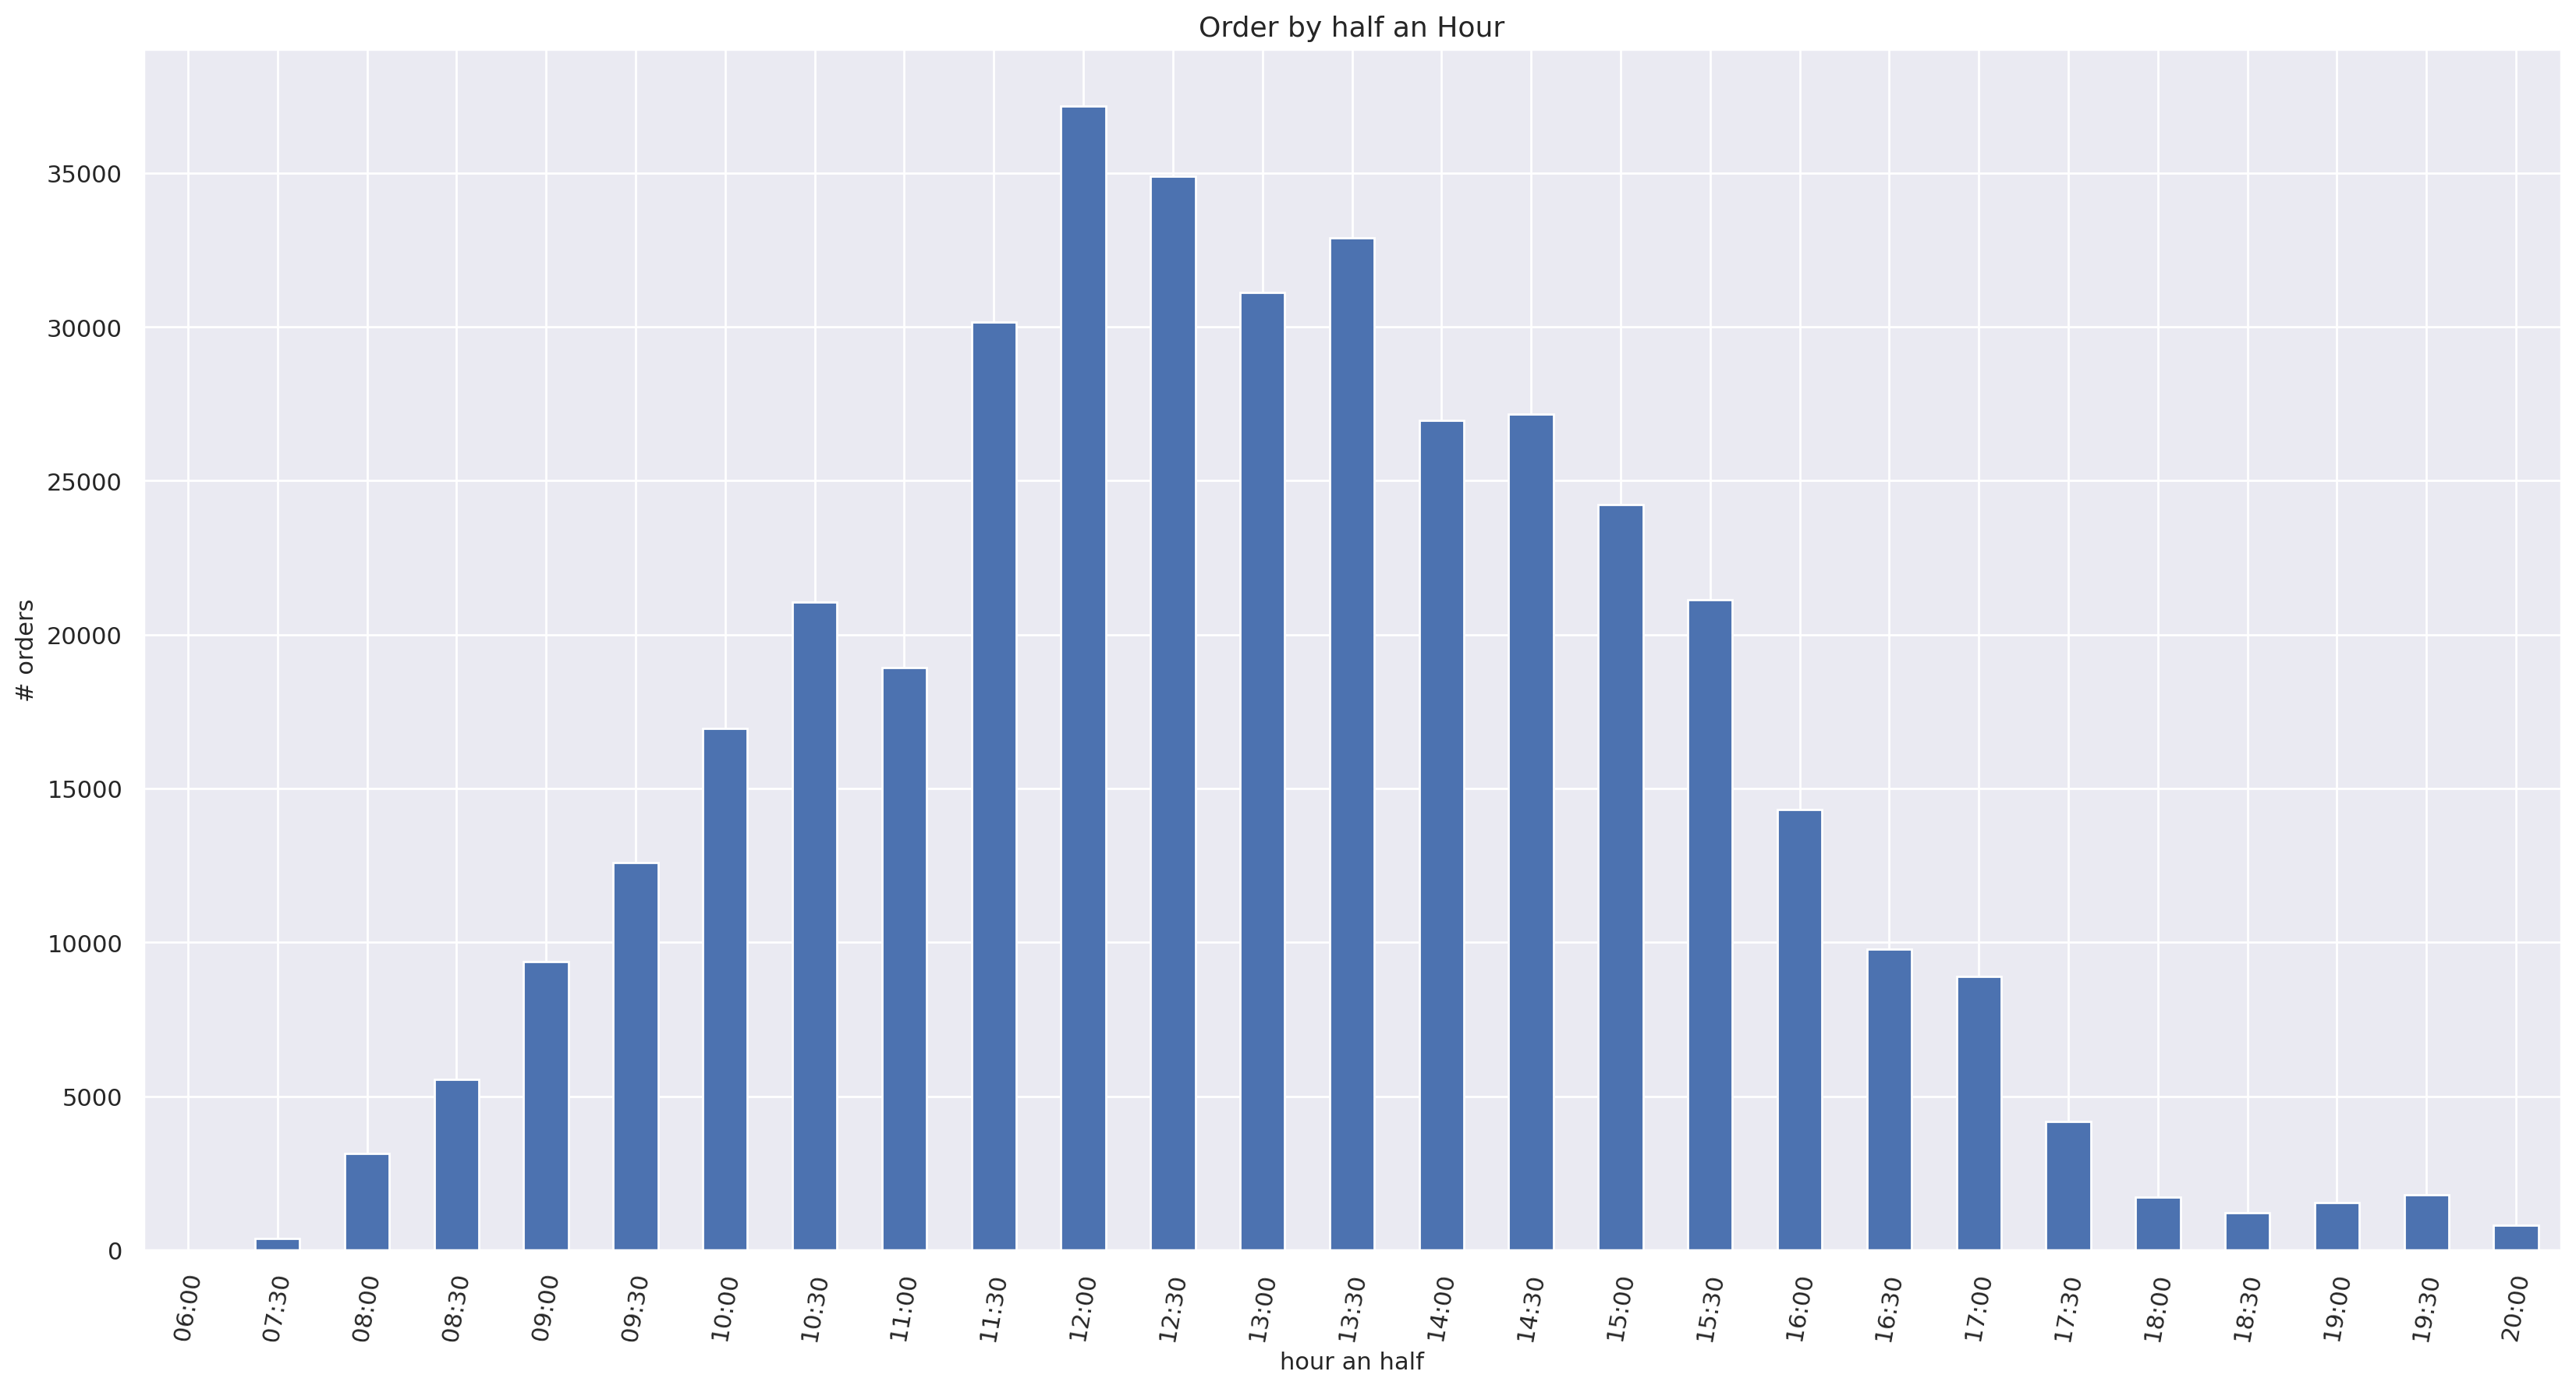

In [69]:
# 차트 시각화

plot_bar(order_by_hour_half,'hour an half','# orders','Order by half an Hour')

In [74]:
# 시간대별 점유율

round(order_by_hour_half.div(order_by_hour_half.sum()) * 100, 2)

InvoiceDate
06:00    0.00
07:30    0.10
08:00    0.79
08:30    1.39
09:00    2.35
09:30    3.16
10:00    4.26
10:30    5.29
11:00    4.76
11:30    7.58
12:00    9.34
12:30    8.77
13:00    7.82
13:30    8.27
14:00    6.78
14:30    6.83
15:00    6.09
15:30    5.31
16:00    3.60
16:30    2.46
17:00    2.23
17:30    1.05
18:00    0.43
18:30    0.30
19:00    0.39
19:30    0.45
20:00    0.20
Name: CustomerID, dtype: float64

### 개인화된 서비스 (사용자)

In [75]:
# 사용자 별 시간대 주문량 확인

order_by_hour_customer = df_retail.set_index('InvoiceDate').groupby(['CustomerID',lambda date:date.hour])['StockCode'].count()
order_by_hour_customer

CustomerID  InvoiceDate
12346       10              1
12347       8              22
            10             24
            12             47
            13             18
                           ..
18283       15              1
            16             56
            19             87
18287       9               3
            10             67
Name: StockCode, Length: 11205, dtype: int64

In [76]:
order_by_hour_customer.loc[12347]

InvoiceDate
8     22
10    24
12    47
13    18
14    60
15    11
Name: StockCode, dtype: int64

In [77]:
# 사용자별 최대주문건수 시간
# CustomerID 가 인덱스 이기 때문에 idxmax() 를 사용할수있다

max_idx = order_by_hour_customer.groupby('CustomerID').idxmax()
max_idx

CustomerID
12346    (12346, 10)
12347    (12347, 14)
12348    (12348, 19)
12349     (12349, 9)
12350    (12350, 16)
            ...     
18280     (18280, 9)
18281    (18281, 10)
18282    (18282, 13)
18283    (18283, 14)
18287    (18287, 10)
Name: StockCode, Length: 4338, dtype: object

In [78]:
order_by_hour_customer.loc[max_idx]

CustomerID  InvoiceDate
12346       10               1
12347       14              60
12348       19              17
12349       9               73
12350       16              17
                          ... 
18280       9               10
18281       10               7
18282       13               7
18283       14             201
18287       10              67
Name: StockCode, Length: 4338, dtype: int64

### 데이터 로드

In [89]:
df_log = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/web.log',
                     sep='\s', names=['ip','session_id','user_id','datetime','request','url','status','bytesize'])

df_log

,ip,session_id,user_id,datetime,request,url,status,bytesize
0,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,[01/Dec/2019T00:47:11],GET,/product_list,200,2107
1,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,[01/Dec/2019T00:51:21],GET,/product_detail,200,1323
2,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,[01/Dec/2019T00:51:43],GET,/product_list,200,2616
3,1.0.1.0,57623182-b78b-4bdc-b977-a2b34612c6d1,user45,[01/Dec/2019T01:04:02],GET,/product_list,200,2303
4,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,[01/Dec/2019T01:12:28],GET,/product_detail,200,1830
...,...,...,...,...,...,...,...,...
1285,1.0.0.3,ef2d546d-aa5d-4d9f-89be-70df7cb1082a,user4,[20/Dec/2019T12:08:14],GET,/checkout,200,1825
1286,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T12:23:02],GET,/product_list,200,2548
1287,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T12:56:12],GET,/product_detail,200,1250
1288,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T13:12:27],GET,/cart,200,2590


In [83]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ip          1290 non-null   object
 1   session_id  1290 non-null   object
 2   user_id     1290 non-null   object
 3   datetime    1290 non-null   object
 4   request     1290 non-null   object
 5   url         1290 non-null   object
 6   status      1290 non-null   int64 
 7   bytesize    1290 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 80.8+ KB


### 데이터 전처리

In [90]:
# datetime 컬럼에서 [20/Dec/2019T13:12:28] => 20/Dec/2019T13:12:28

# df_log['datetime'] = df_log['datetime'].str.replace('[','')
# df_log['datetime'] = df_log['datetime'].str.replace(']','')
# df_log['datetime']

df_log['datetime'] = df_log['datetime'].apply(lambda date:date.replace('[','').replace(']',''))

In [92]:
# 20/Dec/2019T13:12:28 => 2019-12-20 13:12:28 로 변경

df_log['datetime'] = pd.to_datetime(df_log['datetime'], format='%d/%b/%YT%H:%M:%S')

In [93]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ip          1290 non-null   object        
 1   session_id  1290 non-null   object        
 2   user_id     1290 non-null   object        
 3   datetime    1290 non-null   datetime64[ns]
 4   request     1290 non-null   object        
 5   url         1290 non-null   object        
 6   status      1290 non-null   int64         
 7   bytesize    1290 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 80.8+ KB


In [95]:
# url 컬럼 안 값들 확인

# df_log['url'].unique()
df_log['url'].value_counts()

url
/product_list      419
/product_detail    351
/cart              261
/checkout          175
/order_complete     84
Name: count, dtype: int64

In [107]:
# 단계 설정
# /checkout 은 로그아웃 이라서 뺐음
# 데이터프레임 을 먼저 만들기

funnel_dict = {'/product_list':1, "/product_detail":2, '/cart':3, '/order_complete':4}
funnel_steps = pd.DataFrame.from_dict(funnel_dict, orient='index', columns=['step_no'])
funnel_steps

,step_no
/product_list,1
/product_detail,2
/cart,3
/order_complete,4


In [100]:
df_group = df_log.groupby(['session_id','url'])['datetime'].min()
df_group.head(1)

session_id                            url            
000d99d8-d2d4-4e9a-bb06-69b1ae6442d9  /product_detail   2019-12-01 12:06:39
Name: datetime, dtype: datetime64[ns]

In [118]:
# merge

df_group = pd.DataFrame(df_group).merge(funnel_steps, left_on='url', right_index=True)
df_group.head(3)

,,datetime,step_no
session_id,url,,
000d99d8-d2d4-4e9a-bb06-69b1ae6442d9,/product_detail,2019-12-01 12:06:39,2
0155049d-32e7-44de-9b0d-4c02f63d6099,/product_detail,2019-12-04 00:22:44,2
020d4536-1341-4de1-87d3-e22ba8611af6,/product_detail,2019-12-19 06:25:48,2


In [123]:
# pivot_table : 함수가 포함
# pivot : 함수 X
# pivot : index=session_id, columns=step_no , values=datetime

funnel_pivot = df_group.reset_index().pivot(index='session_id', columns='step_no', values='datetime')
funnel_pivot.columns = funnel_steps.index
funnel_pivot.head()

,/product_list,/product_detail,/cart,/order_complete
session_id,,,,
000d99d8-d2d4-4e9a-bb06-69b1ae6442d9,2019-12-01 11:52:32,2019-12-01 12:06:39,NaT,NaT
0155049d-32e7-44de-9b0d-4c02f63d6099,2019-12-04 00:12:47,2019-12-04 00:22:44,NaT,NaT
020d4536-1341-4de1-87d3-e22ba8611af6,2019-12-19 06:22:54,2019-12-19 06:25:48,2019-12-19 06:58:23,NaT
0381411a-78d8-4c27-9622-3210b7ed62d6,2019-12-05 04:48:34,2019-12-05 05:09:32,2019-12-05 05:35:16,NaT
06268108-6228-4237-ac1d-7927dd44273d,2019-12-11 04:15:46,2019-12-11 04:17:31,2019-12-11 04:45:05,NaT


In [125]:
# 1단계:419 ~ 4단계:84 이탈율이 많다

for idx in funnel_steps.index:
  # print(idx)
  print(funnel_pivot[idx].notnull().sum())

419
351
261
84


In [127]:
# 리스트로 만들기

# list1 = []
# for idx in funnel_steps.index:
#   list1.append(funnel_pivot[idx].notnull().sum())
# list1

# 리스트컴프리핸션
step_values = [funnel_pivot[idx].notnull().sum() for idx in funnel_steps.index]
step_values

[419, 351, 261, 84]

### Plotly 차트
- https://plotly.com/python/funnel-charts/
- funnel 차트 그리기 좋다
- 동적 차트 이다

In [128]:
!pip install plotly

In [129]:
from plotly import graph_objects as go

In [130]:
def show_funnel(funnel_values, funnel_steps):
  fig = go.Figure(go.Funnel(
      y = funnel_steps,
      x = funnel_values))

  fig.show()

In [131]:
# 차트 그리기

show_funnel(step_values,funnel_steps.index)

In [132]:
# 평균 시간 계산
# 머무른 시간 : funnel_pivot['/product_detail'] - funnel_pivot['/product_list']

np.mean(funnel_pivot['/product_detail'] - funnel_pivot['/product_list'])

Timedelta('0 days 00:16:50.635327635')

In [133]:
np.mean(funnel_pivot['/cart'] - funnel_pivot['/product_detail'])

Timedelta('0 days 00:18:42.804597701')

In [134]:
np.mean(funnel_pivot['/order_complete'] - funnel_pivot['/cart'])

Timedelta('0 days 00:33:35.904761904')